In [ ]:
!pip install xgboost optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 10.7 MB/s eta 0:00:00


In [ ]:
#imports and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Advanced Libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import optuna

# Standard Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report



--- Data Loaded Successfully ---


In [ ]:
import pandas as pd

# Load Data
try:
    df = pd.read_csv('PCOS_extended_dataset.csv')
    print("--- Data Loaded Successfully ---")
except FileNotFoundError:
    print("Error: File not found.")
    exit()

--- Data Loaded Successfully ---


In [ ]:
#Pre-processing
print("\n--- 1. Data Cleaning & Preprocessing ---")

# A. Drop ID Columns (Irrelevant)
cols_to_drop = ['Sl. No', 'Patient File No.']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# B. Force Numeric Conversion
# (PCOS data often has hidden text errors like "NaN" string in numeric cols)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# C. Handle Missing Values (Median Imputation)
# Robust against outliers common in medical data
df.fillna(df.median(), inplace=True)

# D. Define Features & Target
target_col = 'PCOS (Y/N)'
X = df.drop(columns=[target_col])
y = df[target_col]

# E. Scale Data (MANDATORY for SVM, K-Means, DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# F. Split Data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Data Cleaned, Scaled, and Split.")


--- 1. Data Cleaning & Preprocessing ---
Data Cleaned, Scaled, and Split.


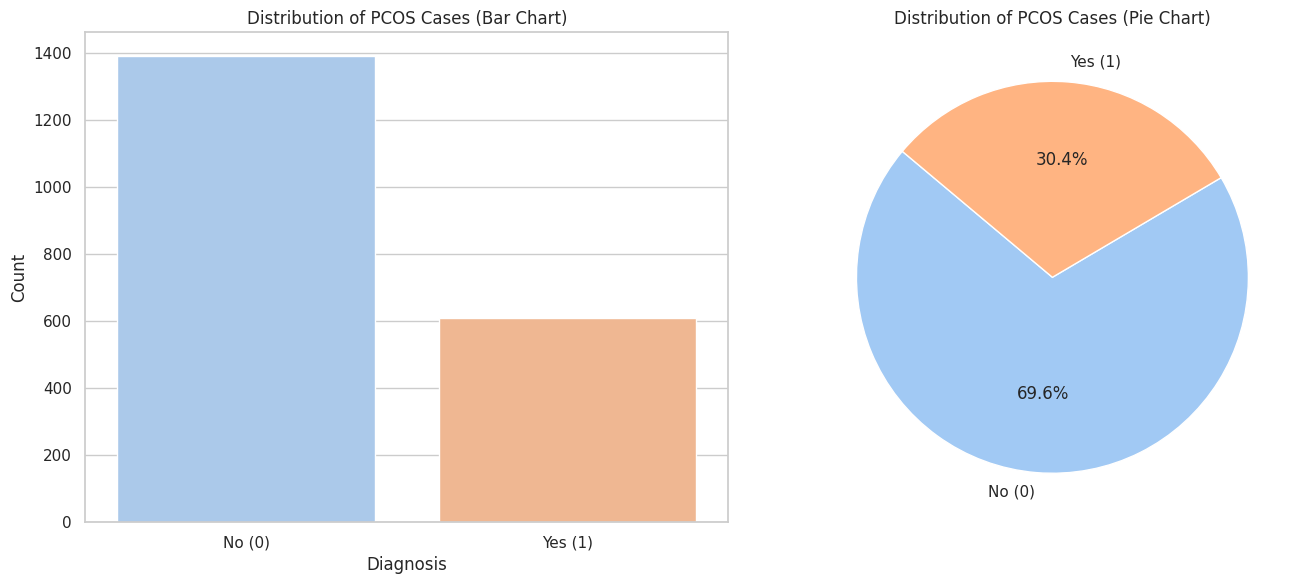

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Target variable distribution
# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Target column
target_col = 'PCOS (Y/N)'

# Count the occurrences
pcos_counts = df[target_col].value_counts()

# Create labels for the plot
labels = {0: 'No (0)', 1: 'Yes (1)'}
mapped_index = pcos_counts.index.map(labels)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Bar Chart
sns.barplot(x=mapped_index, y=pcos_counts.values, ax=axes[0], palette='pastel', hue=mapped_index, legend=False)
axes[0].set_title('Distribution of PCOS Cases (Bar Chart)')
axes[0].set_xlabel('Diagnosis')
axes[0].set_ylabel('Count')

# 2. Pie Chart
axes[1].pie(pcos_counts, labels=mapped_index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', 2))
axes[1].set_title('Distribution of PCOS Cases (Pie Chart)')

# Save the figure
plt.tight_layout()
plt.savefig('pcos_distribution.png')
plt.show()

Saved pcos_categorical_distribution.png


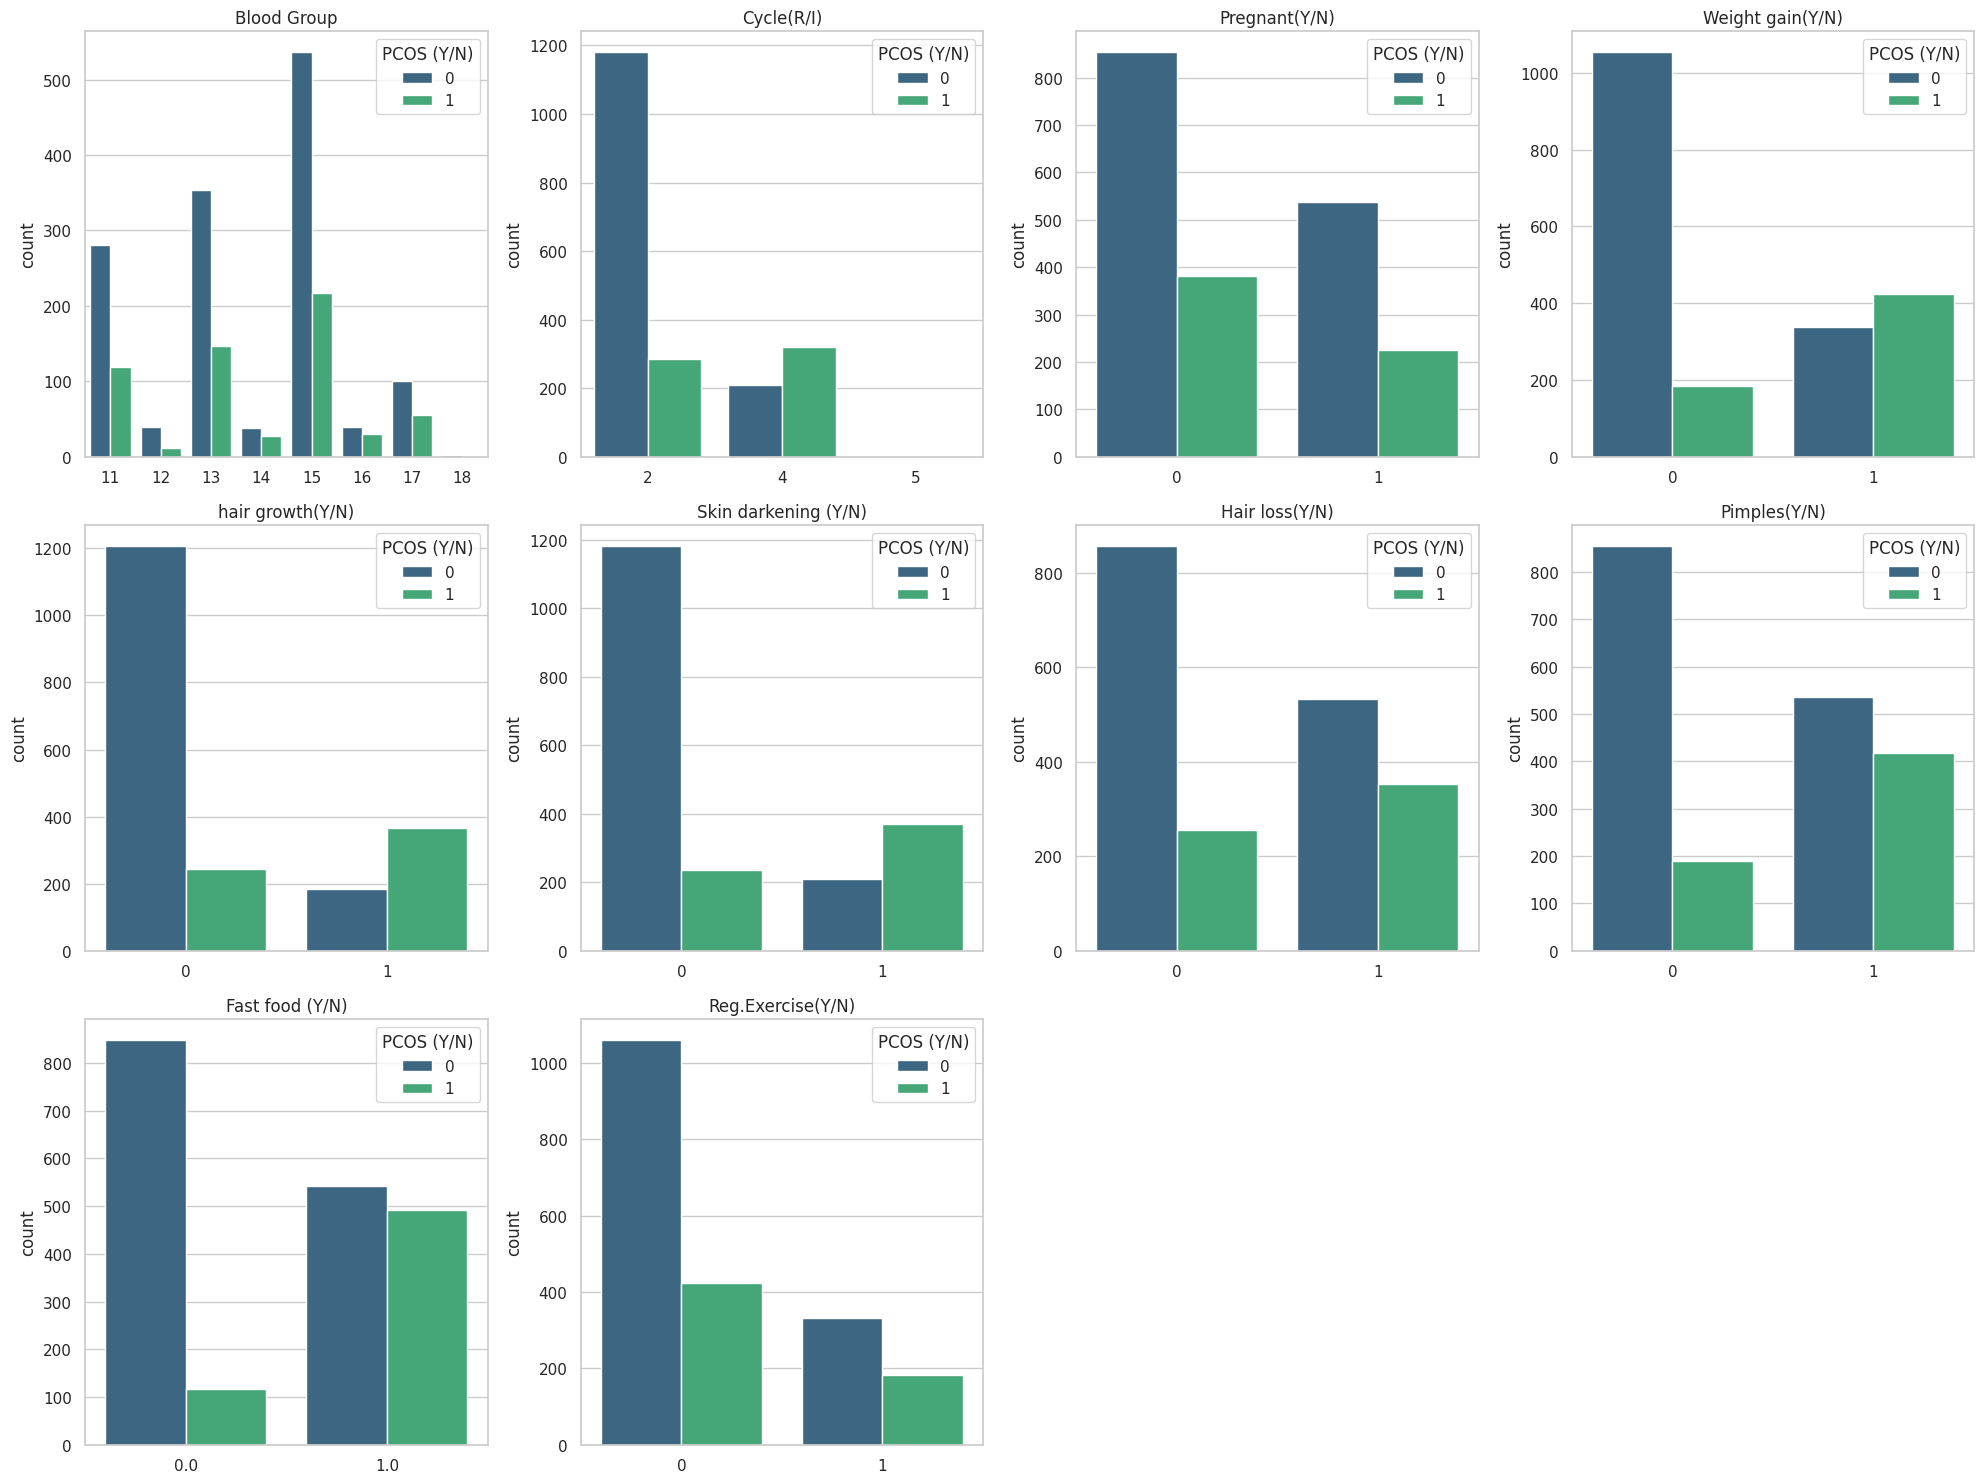

/tmp/ipython-input-1088116108.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PCOS (Y/N)', y=feature, ax=axes[i], palette='viridis')
/tmp/ipython-input-1088116108.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PCOS (Y/N)', y=feature, ax=axes[i], palette='viridis')
/tmp/ipython-input-1088116108.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PCOS (Y/N)', y=feature, ax=axes[i], palette='viridis')
/tmp/ipython-input-1088116108.py:54: FutureWarning: 

Passing `palette` without assigning `hue` i

Saved pcos_physical_distribution.png


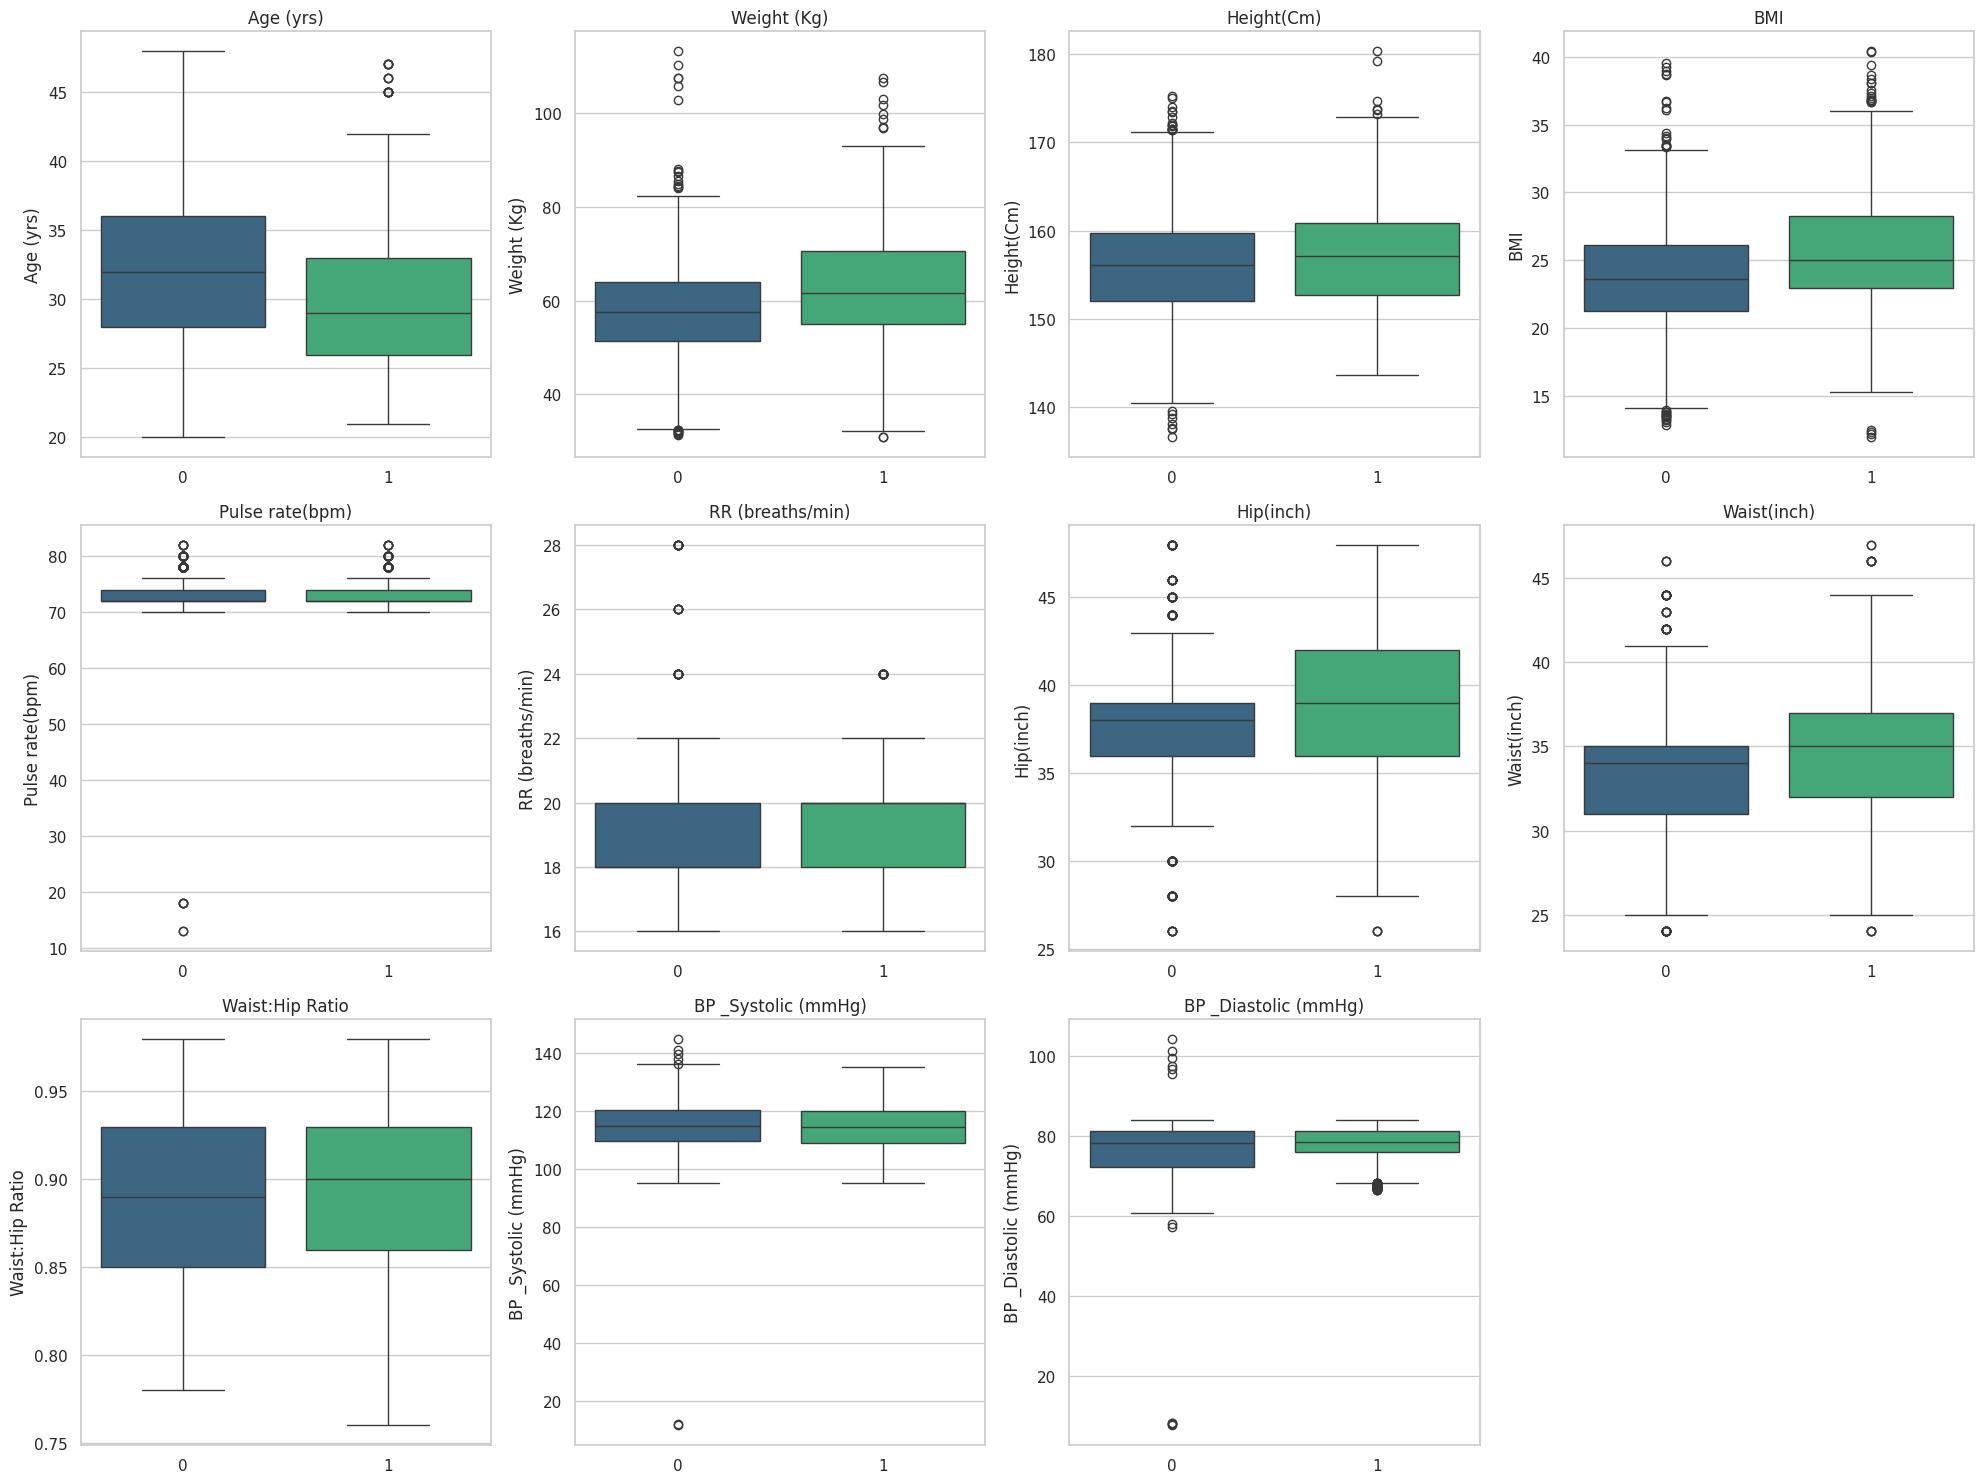

/tmp/ipython-input-1088116108.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PCOS (Y/N)', y=feature, ax=axes[i], palette='viridis')
/tmp/ipython-input-1088116108.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PCOS (Y/N)', y=feature, ax=axes[i], palette='viridis')
/tmp/ipython-input-1088116108.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PCOS (Y/N)', y=feature, ax=axes[i], palette='viridis')
/tmp/ipython-input-1088116108.py:54: FutureWarning: 

Passing `palette` without assigning `hue` i

Saved pcos_hormonal_distribution.png


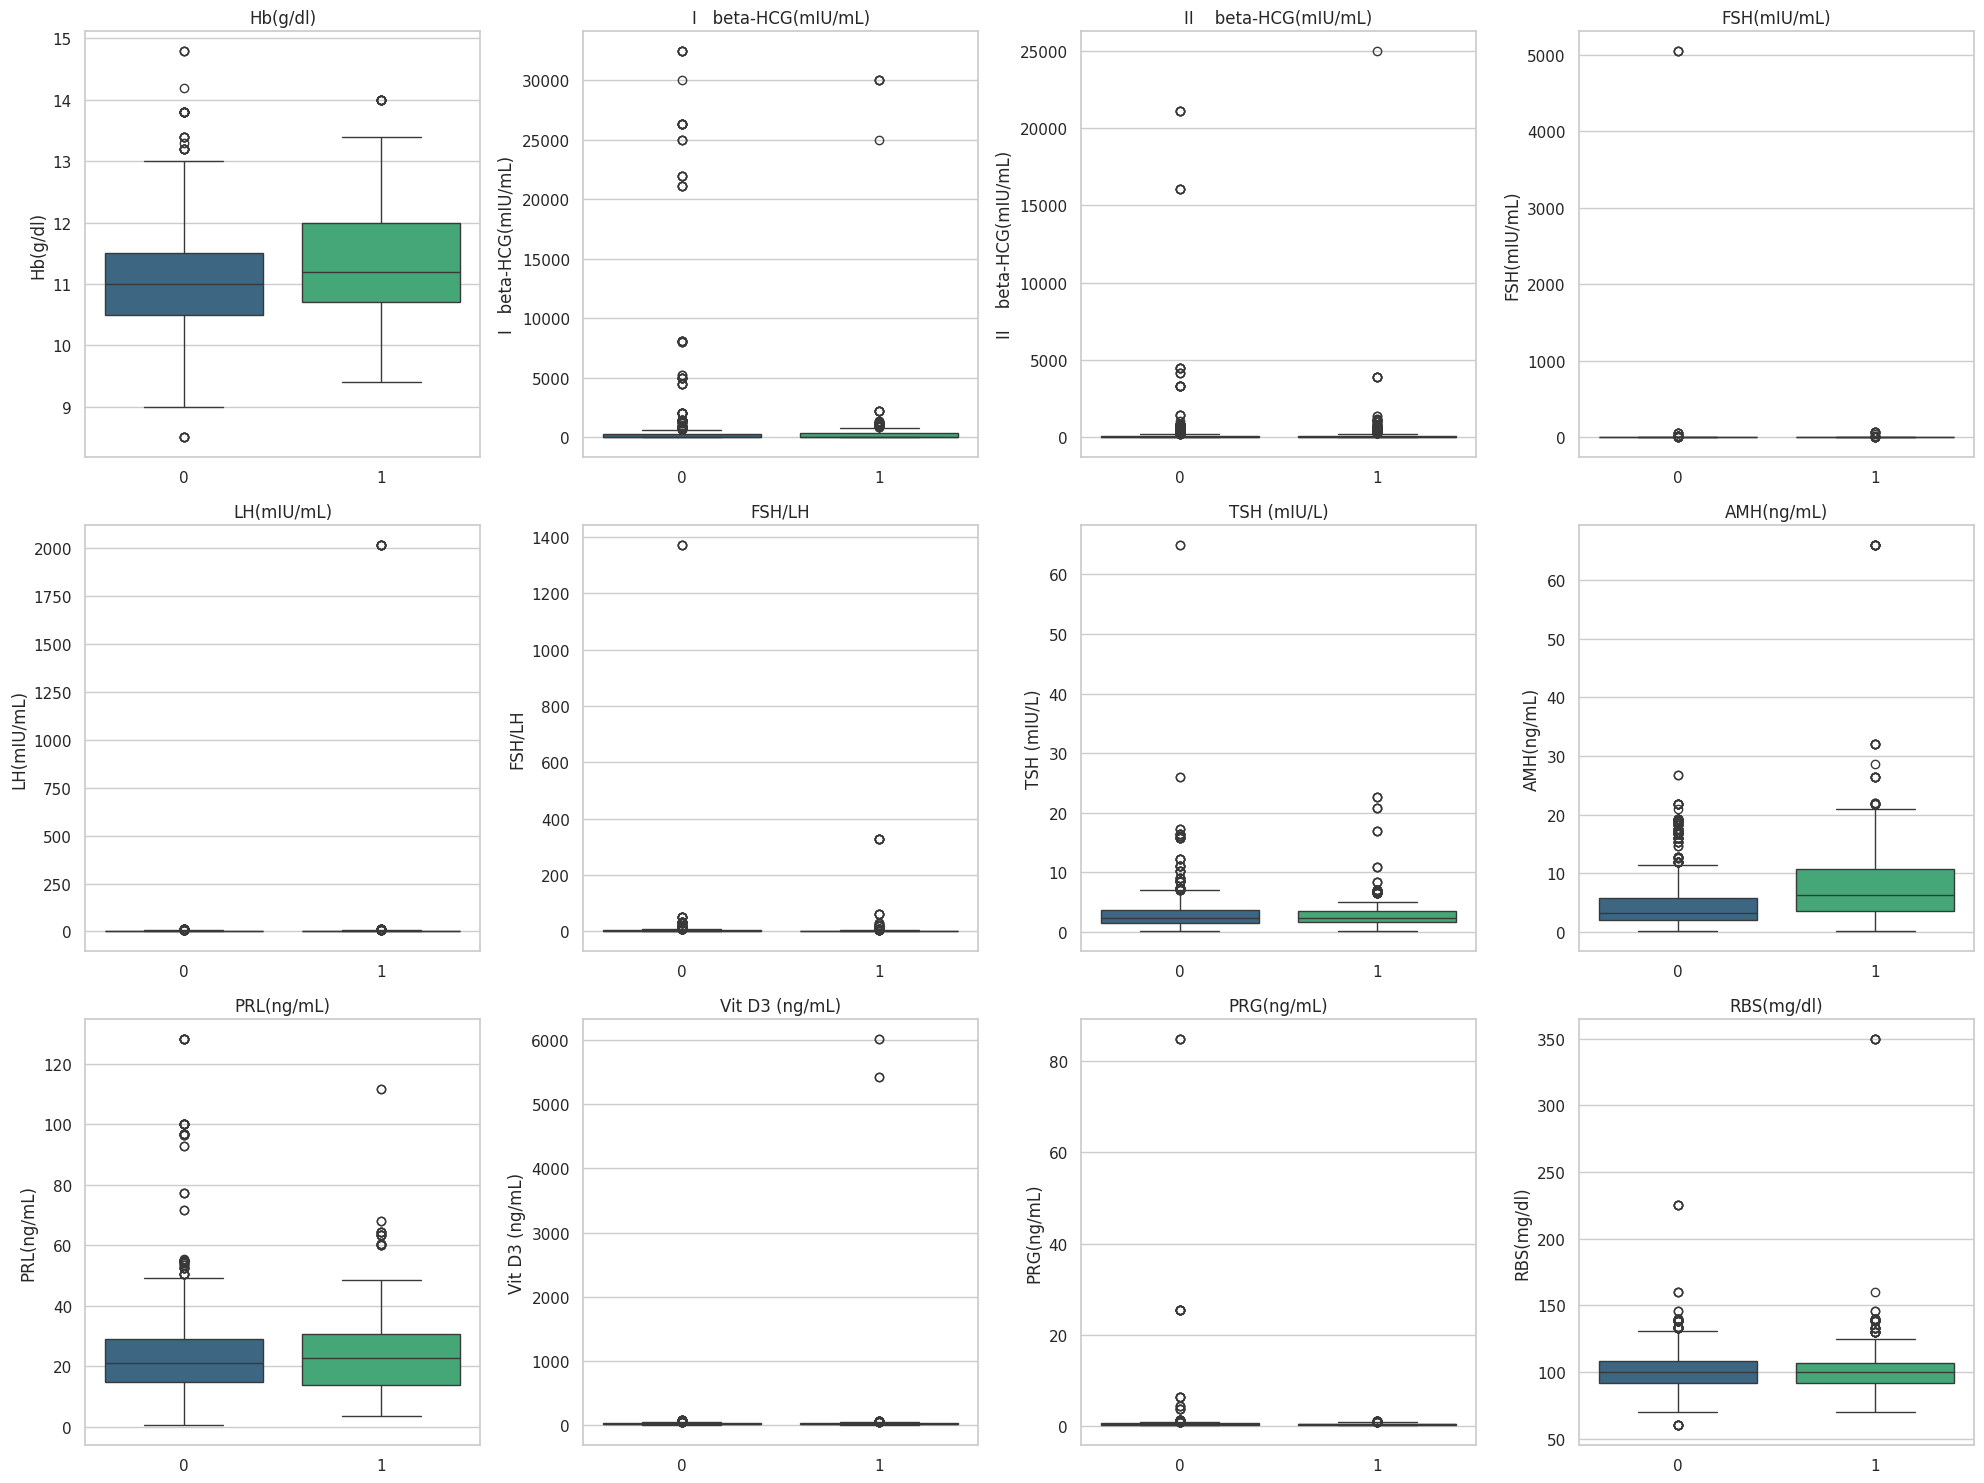

/tmp/ipython-input-1088116108.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PCOS (Y/N)', y=feature, ax=axes[i], palette='viridis')
/tmp/ipython-input-1088116108.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PCOS (Y/N)', y=feature, ax=axes[i], palette='viridis')
/tmp/ipython-input-1088116108.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PCOS (Y/N)', y=feature, ax=axes[i], palette='viridis')
/tmp/ipython-input-1088116108.py:54: FutureWarning: 

Passing `palette` without assigning `hue` i

Saved pcos_reproductive_distribution.png


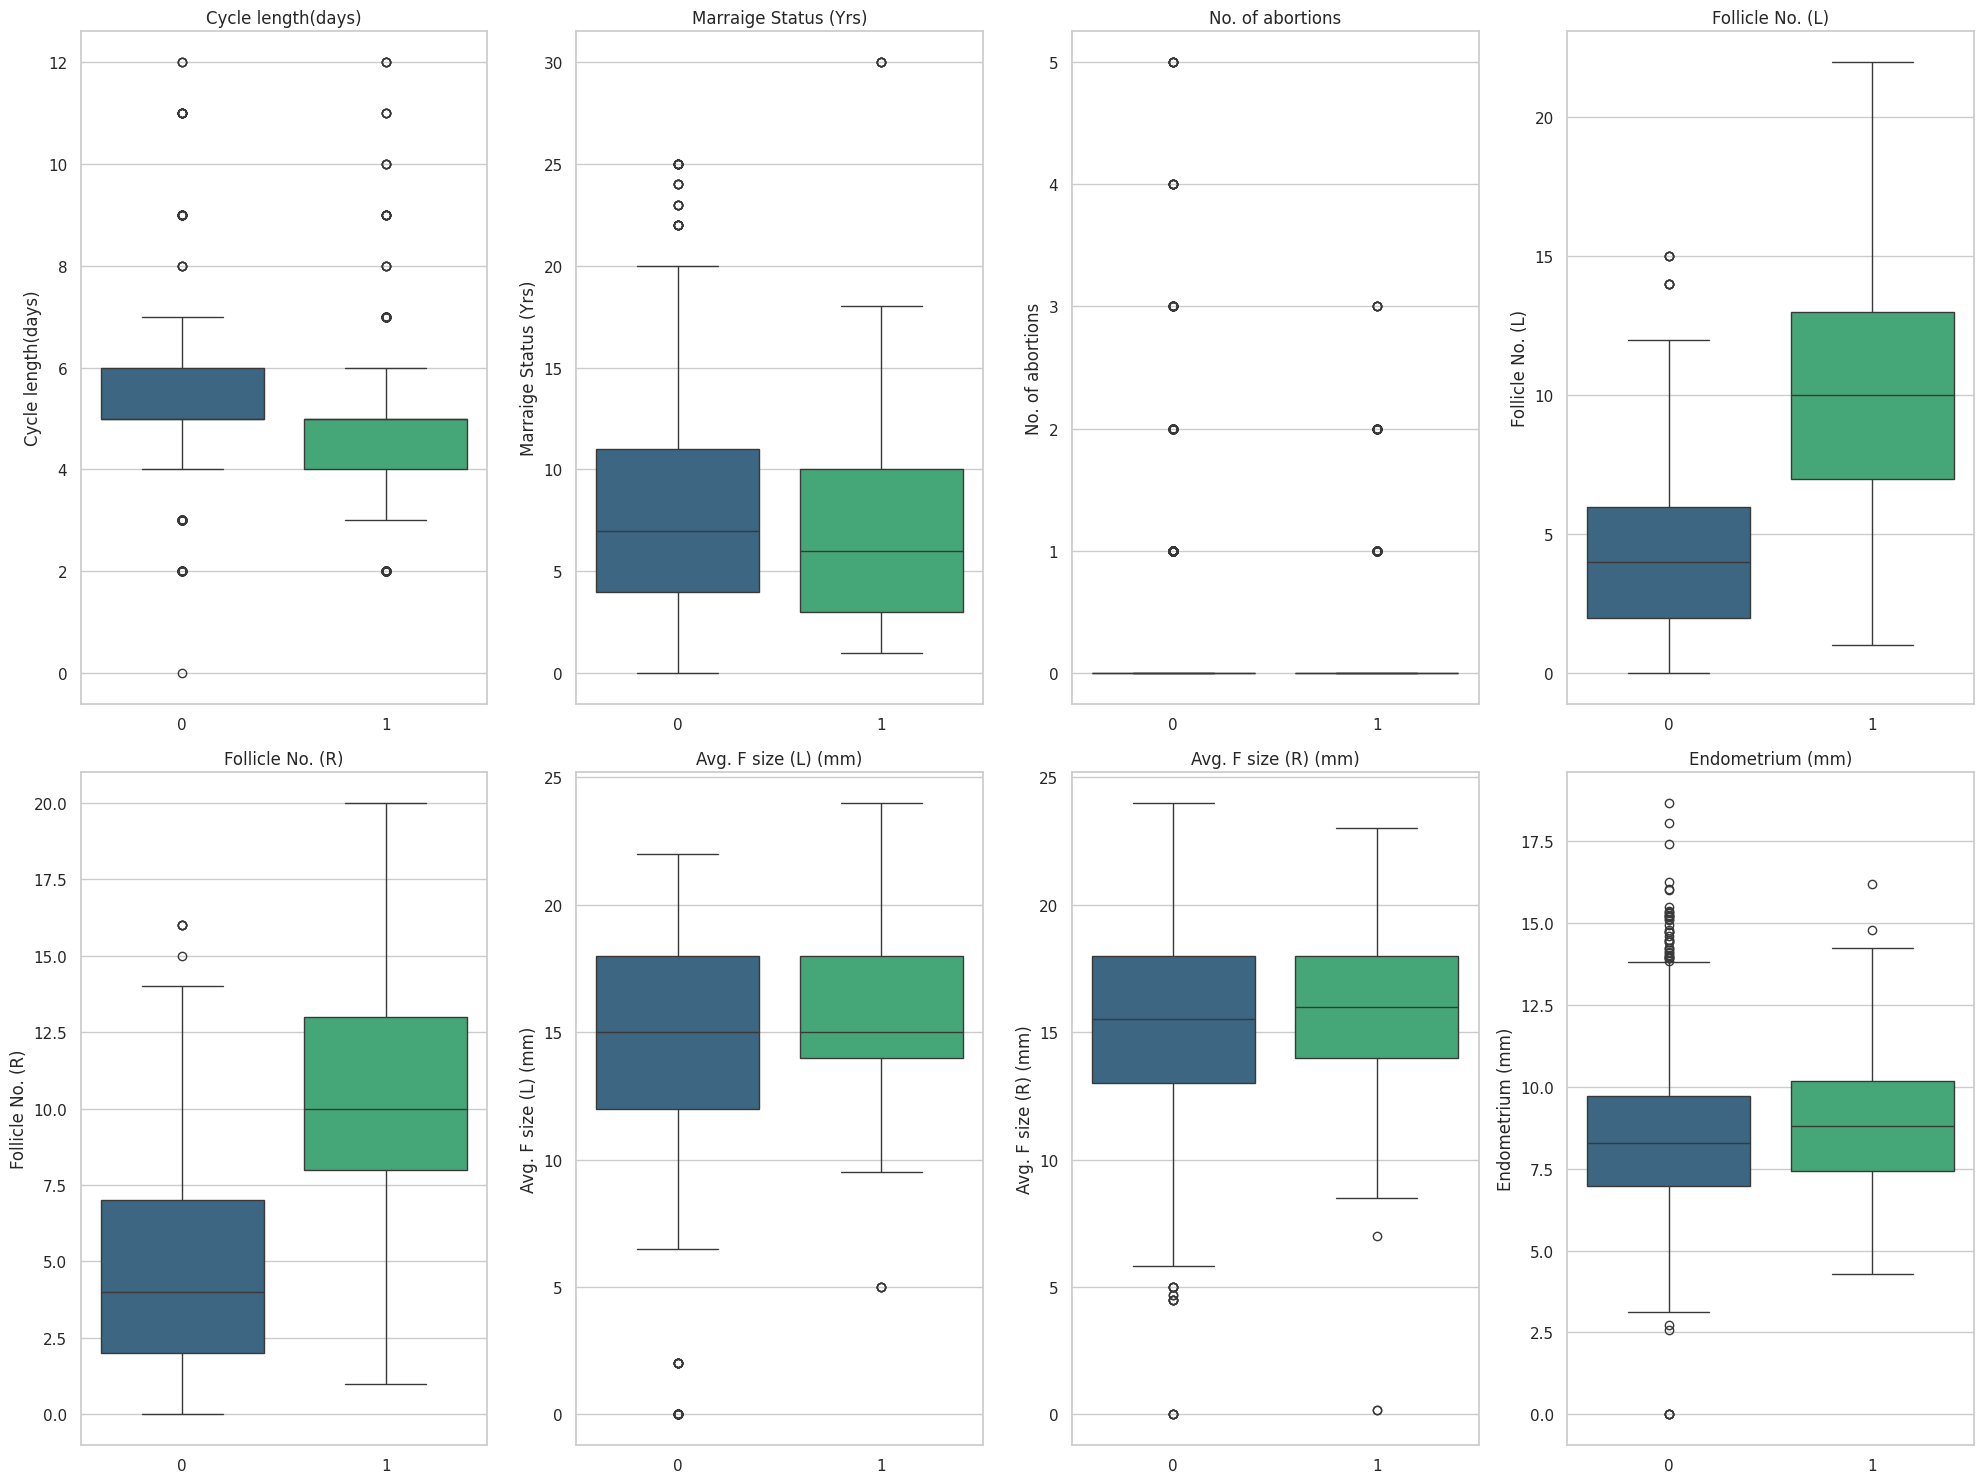

In [ ]:
#Visualise all the attributes distribution
# Clean column names by removing leading/trailing whitespace
df.columns = [col.strip() for col in df.columns]

# Data Cleaning: Convert object columns to numeric, handling errors
# Columns like 'II beta-HCG' and 'AMH' might contain non-numeric characters
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')
df['Fast food (Y/N)'] = pd.to_numeric(df['Fast food (Y/N)'], errors='coerce')

# Define groups of features for organized plotting
categorical_cols = [
    'Blood Group', 'Cycle(R/I)', 'Pregnant(Y/N)', 'Weight gain(Y/N)',
    'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
    'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)'
]

numerical_physical = [
    'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Pulse rate(bpm)',
    'RR (breaths/min)', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
    'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)'
]

numerical_hormonal = [
    'Hb(g/dl)', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
    'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)',
    'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)'
]

numerical_reproductive = [
    'Cycle length(days)', 'Marraige Status (Yrs)', 'No. of abortions',
    'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
    'Avg. F size (R) (mm)', 'Endometrium (mm)'
]

# Set visualization style
sns.set(style="whitegrid")

# Function to create and save subplots
def create_subplots(feature_list, plot_type, filename, size=(20, 15)):
    n = len(feature_list)
    cols = 4
    rows = (n + cols - 1) // cols # Calculate required rows

    fig, axes = plt.subplots(rows, cols, figsize=size)
    axes = axes.flatten()

    for i, feature in enumerate(feature_list):
        if plot_type == 'count':
            # Bar chart for categorical data
            sns.countplot(data=df, x=feature, hue='PCOS (Y/N)', ax=axes[i], palette='viridis')
        elif plot_type == 'box':
            # Box plot for numerical data
            sns.boxplot(data=df, x='PCOS (Y/N)', y=feature, ax=axes[i], palette='viridis')
        axes[i].set_title(feature)
        axes[i].set_xlabel('') # Clean up x-label for cleaner look

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig(filename)
    print(f"Saved {filename}")
    plt.show()

# Generate the plots
create_subplots(categorical_cols, 'count', 'pcos_categorical_distribution.png')
create_subplots(numerical_physical, 'box', 'pcos_physical_distribution.png')
create_subplots(numerical_hormonal, 'box', 'pcos_hormonal_distribution.png')
create_subplots(numerical_reproductive, 'box', 'pcos_reproductive_distribution.png')

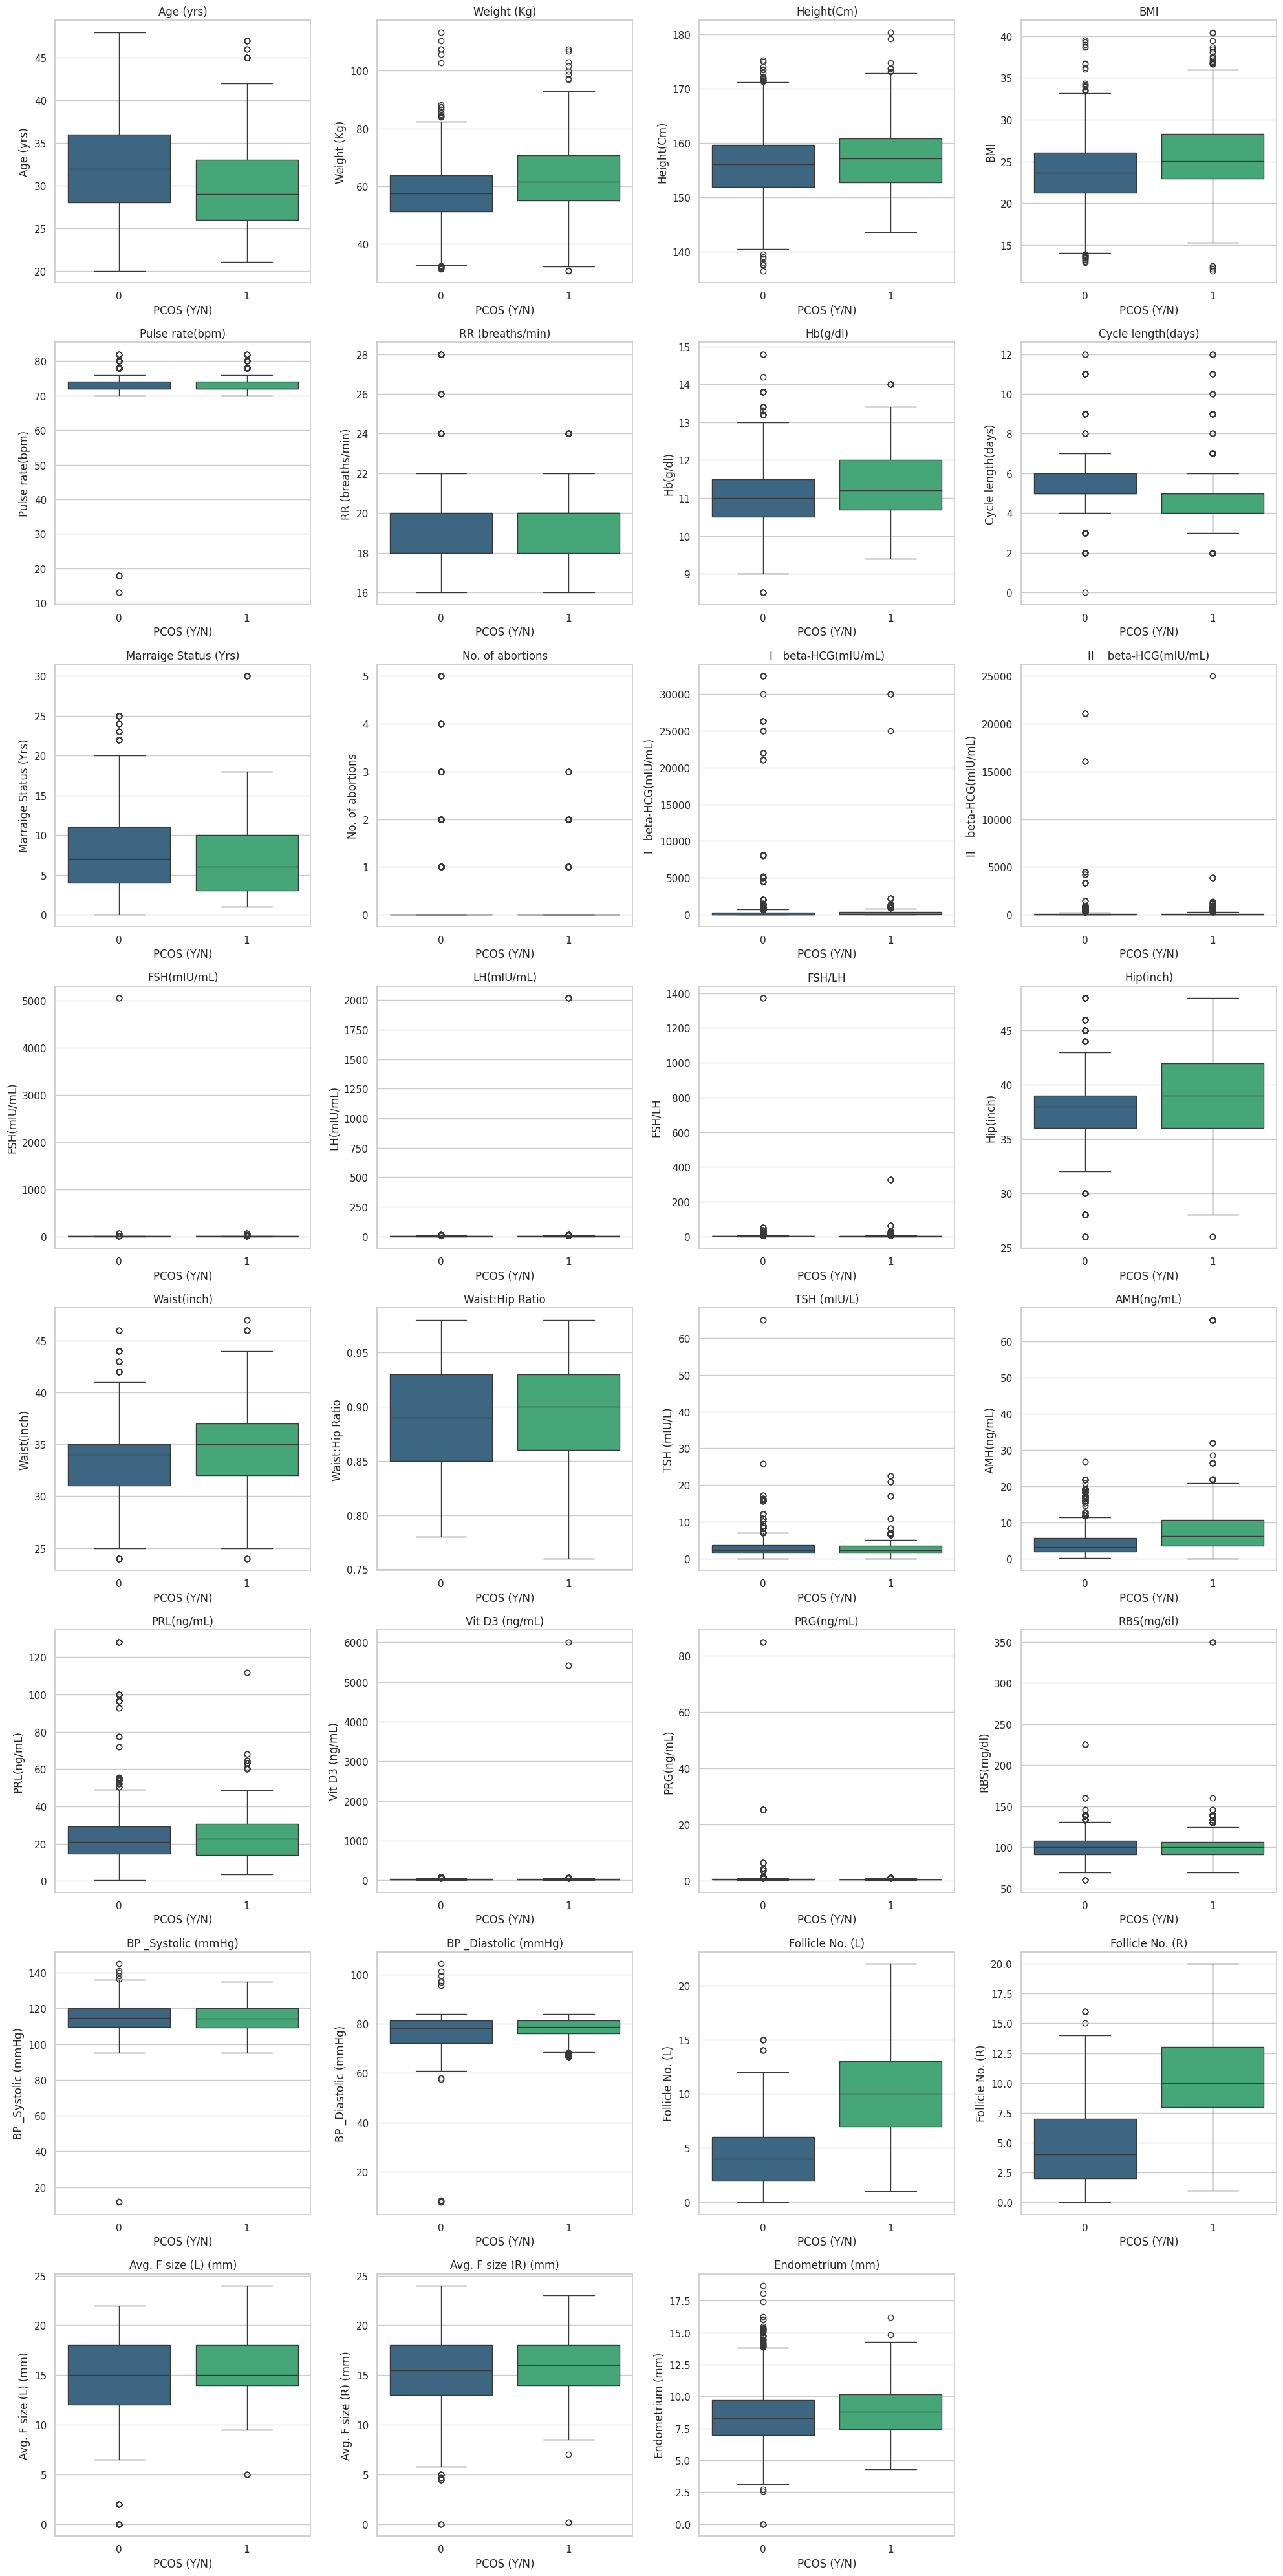

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Box plots for numerical features by Result
# Clean column names
df.columns = [col.strip() for col in df.columns]

# Convert potential non-numeric columns to numeric (handling errors)
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')

# List of numerical features to plot
# We exclude IDs and categorical variables to focus on continuous/discrete measurements
numerical_features = [
    'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Pulse rate(bpm)',
    'RR (breaths/min)', 'Hb(g/dl)', 'Cycle length(days)', 'Marraige Status (Yrs)',
    'No. of abortions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
    'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
    'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
    'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)',
    'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
    'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'
]

# Calculate grid dimensions dynamically
n_features = len(numerical_features)
n_cols = 4
n_rows = math.ceil(n_features / n_cols)

# Create the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x='PCOS (Y/N)', y=feature, ax=axes[i], palette='viridis', hue='PCOS (Y/N)', legend=False)
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('PCOS (Y/N)')
    axes[i].set_ylabel(feature)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('pcos_numerical_boxplots.png')

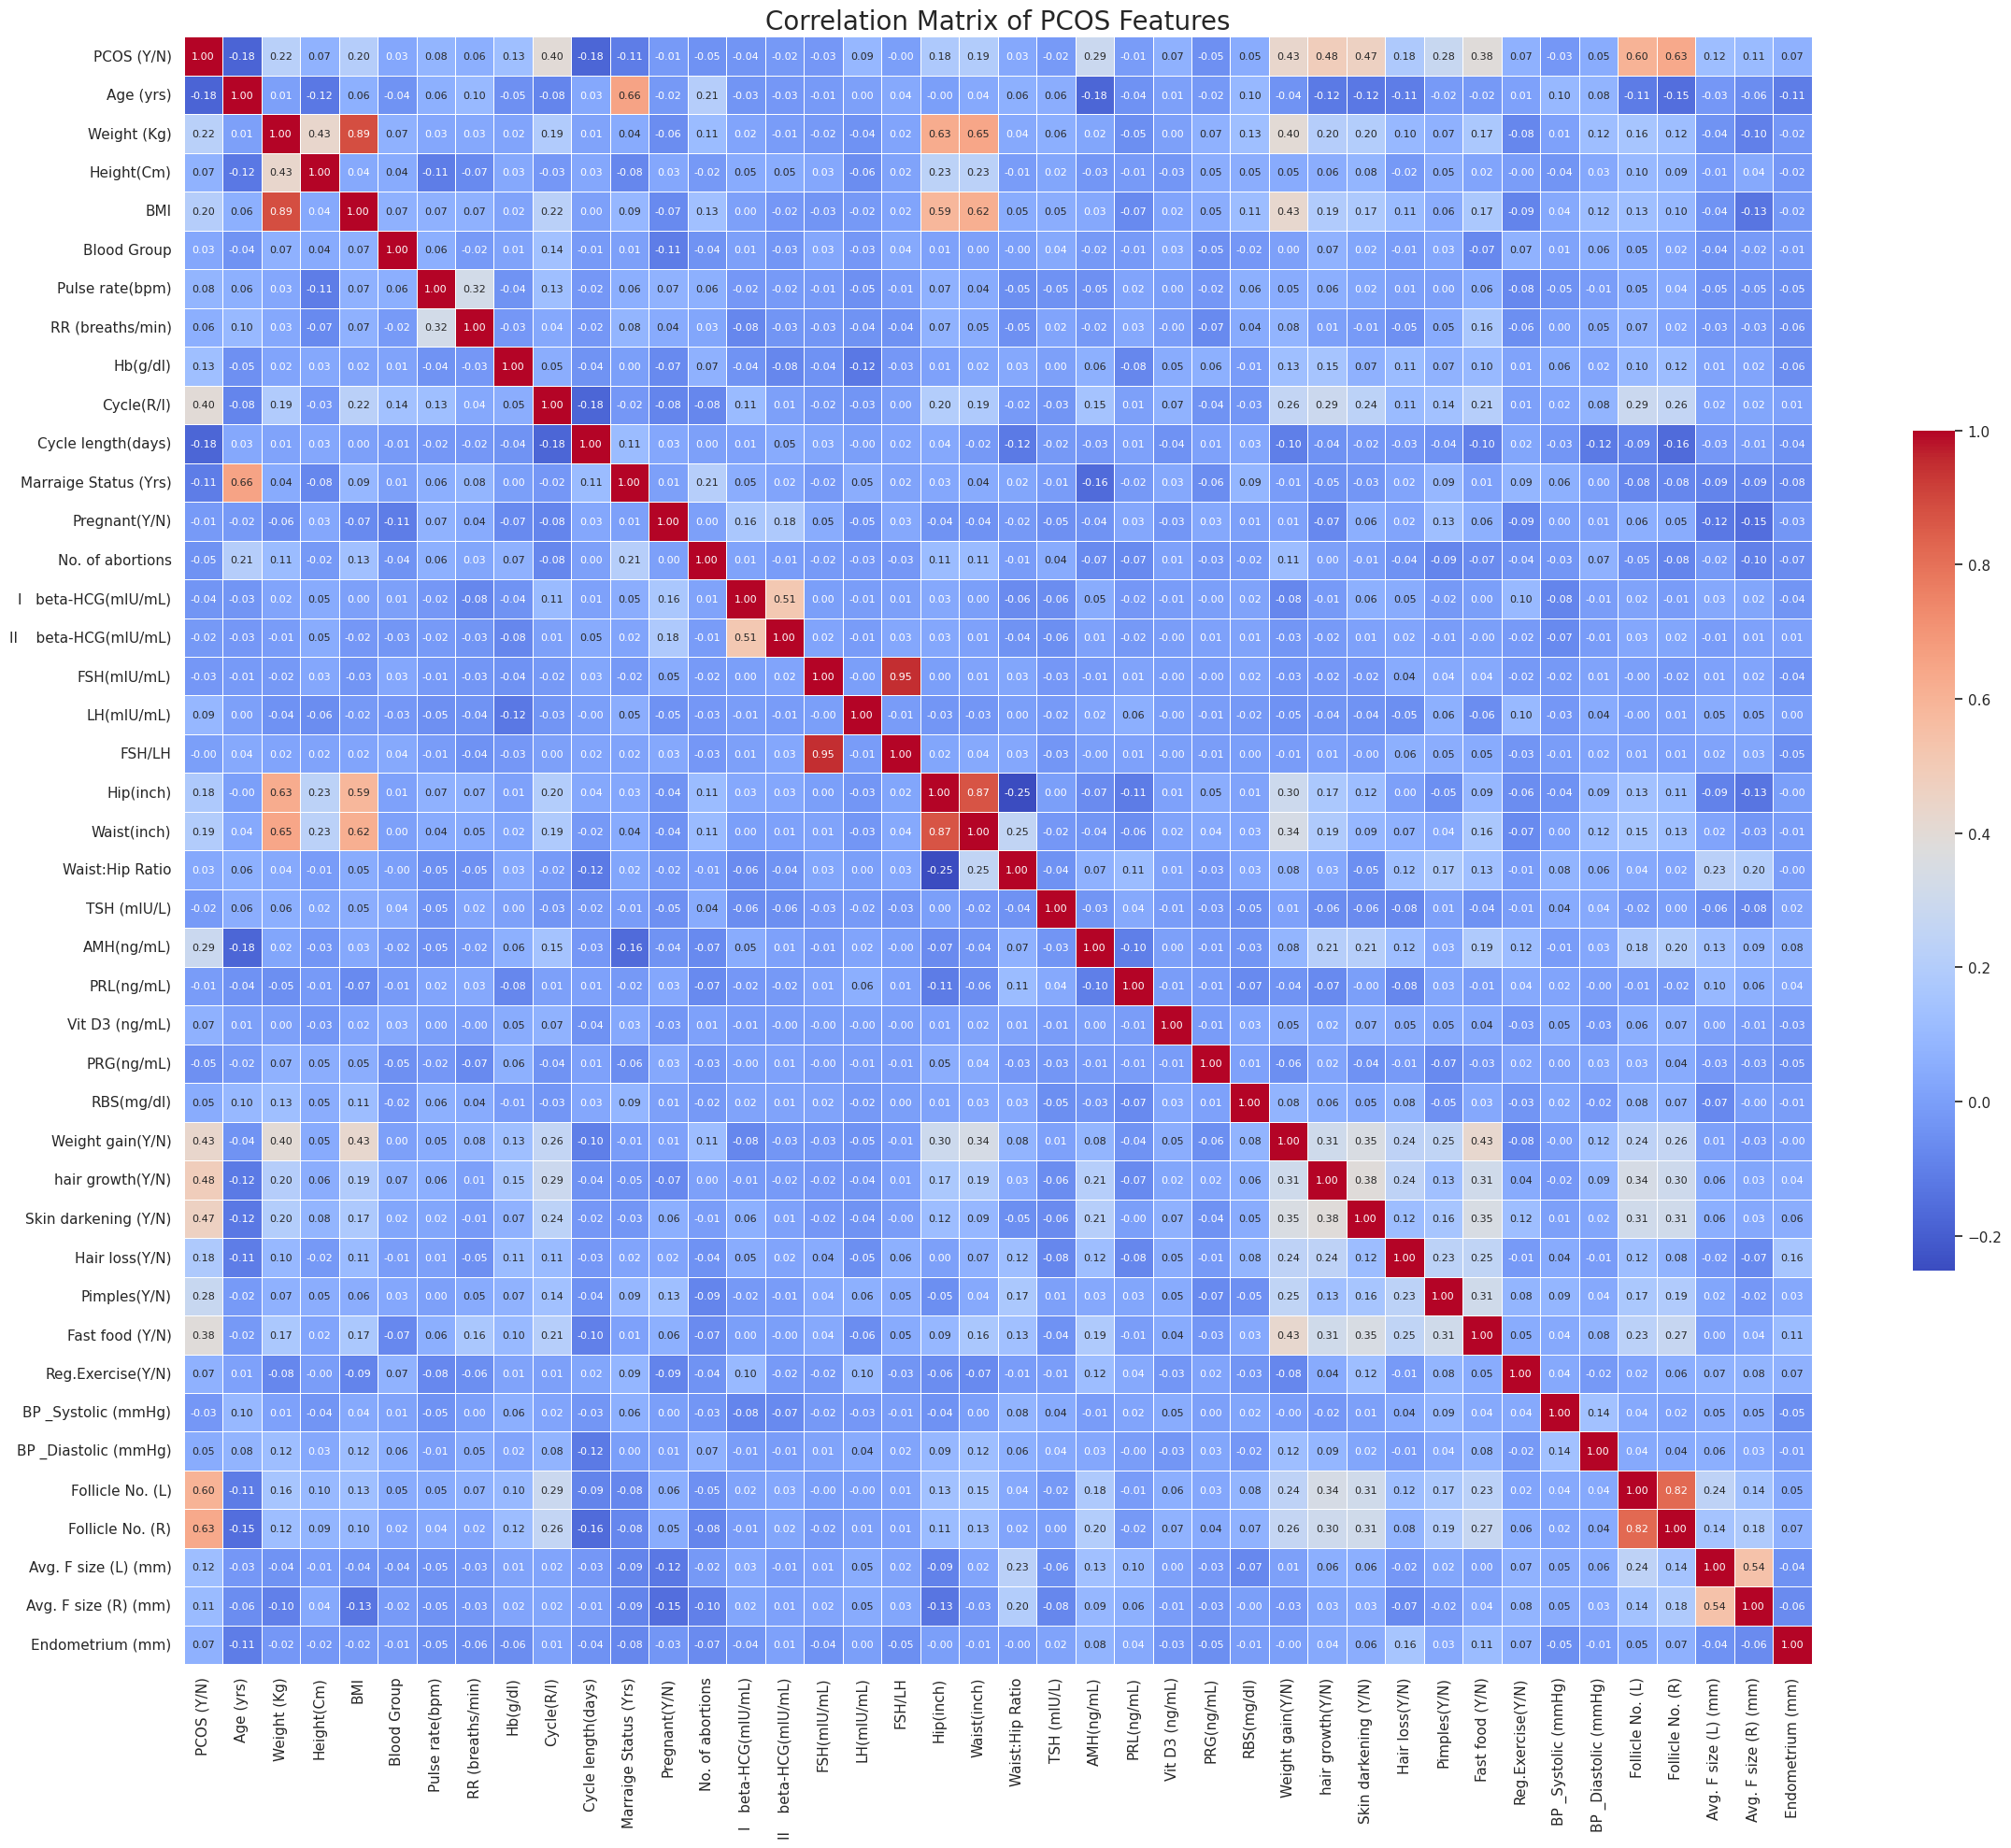

In [ ]:
# Correlation matrix heatmap
# Clean column names (removing leading/trailing spaces)
df.columns = [col.strip() for col in df.columns]

# Convert columns that might be read as objects to numeric
# 'errors='coerce'' turns non-numeric values into NaN, which are ignored in correlation
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')

# Drop identifier columns which are not useful for correlation analysis
cols_to_drop = ['Sl. No', 'Patient File No.']
df_corr = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# Select only numerical columns just in case
df_corr = df_corr.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Create the heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix,
            annot=True,       # Show the correlation values in the squares
            fmt=".2f",        # Format to 2 decimal places
            cmap='coolwarm',  # Color map: Red (pos), Blue (neg)
            square=True,      # Make cells square
            linewidths=.5,    # Space between cells
            cbar_kws={"shrink": .5}, # Shrink the color bar
            annot_kws={"size": 8})   # Font size for annotations

plt.title('Correlation Matrix of PCOS Features', fontsize=20)
plt.xticks(rotation=90) # Rotate x labels for readability
plt.yticks(rotation=0)

# Save the plot
plt.tight_layout()
plt.savefig('pcos_correlation_heatmap.png')
plt.show()

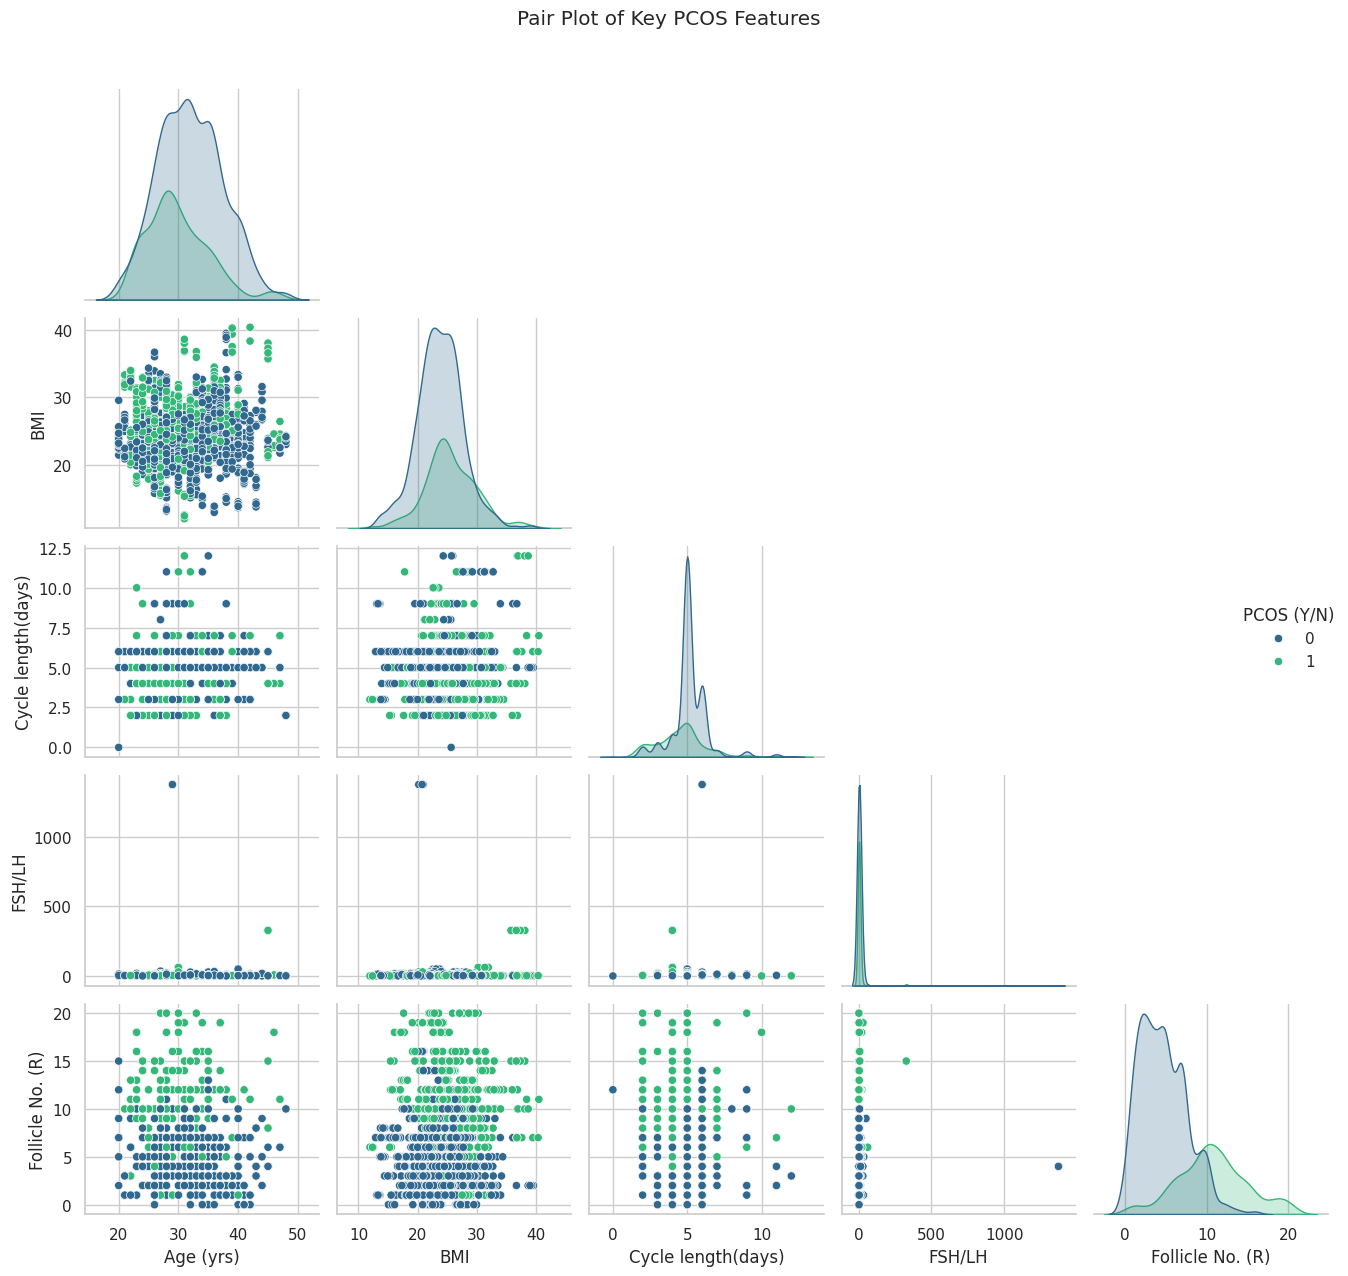

In [ ]:
# Pair plot for key features
# Clean column names
df.columns = [col.strip() for col in df.columns]

# Select key features for the pair plot
# We chose a mix of physical (BMI, Age), reproductive (Cycle length, Follicle No.),
# and hormonal (FSH/LH) features to provide a comprehensive view.
key_features = ['Age (yrs)', 'BMI', 'Cycle length(days)', 'FSH/LH', 'Follicle No. (R)', 'PCOS (Y/N)']

# Filter the dataframe
df_subset = df[key_features]

# Create the pair plot
# hue='PCOS (Y/N)' colors the points by diagnosis (0=No, 1=Yes)
# corner=True removes the redundant upper triangle of plots
pair_plot = sns.pairplot(df_subset, hue='PCOS (Y/N)', palette='viridis', diag_kind='kde', corner=True)
pair_plot.fig.suptitle('Pair Plot of Key PCOS Features', y=1.02)

# Save the figure
plt.tight_layout()
plt.savefig('pcos_key_features_pairplot.png')
plt.show()


--- 2. Clustering Analysis (K-Means & DBSCAN) ---


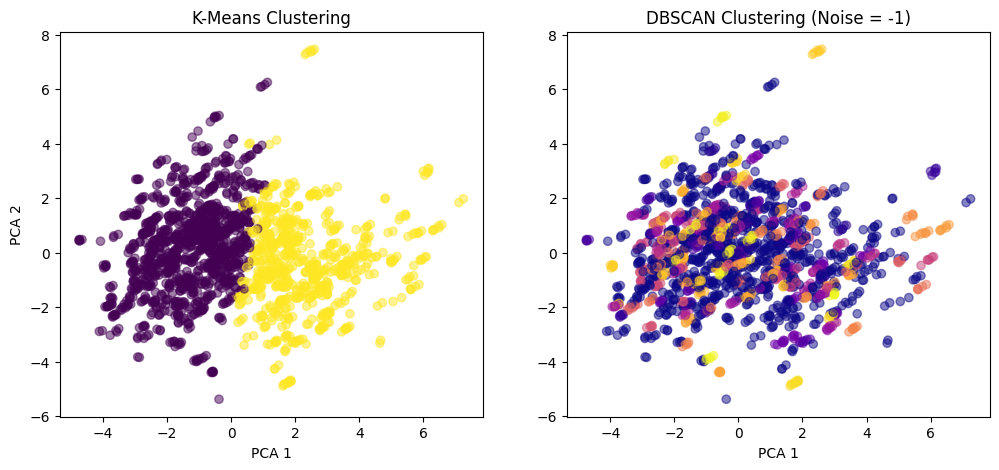

In [ ]:

#  CLUSTERING (Unsupervised)

print("\n--- 2. Clustering Analysis (K-Means & DBSCAN) ---")

# Reduce dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# A. K-Means
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
km_clusters = kmeans.fit_predict(X_scaled)

# B. DBSCAN (Density-Based Clustering)
dbscan = DBSCAN(eps=3, min_samples=5)
db_clusters = dbscan.fit_predict(X_scaled)

# Visualize K-Means
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km_clusters, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Visualize DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_clusters, cmap='plasma', alpha=0.5)
plt.title('DBSCAN Clustering (Noise = -1)')
plt.xlabel('PCA 1')
plt.show()


In [ ]:
#  MODEL COMPARISON (Linear, Tree, SVM, Boosting)

print("\n--- 3. Supervised Model Comparison ---")

models = {
    "Logistic Regression": LogisticRegression(),       # The "Linear" Classifier
    "Decision Tree": DecisionTreeClassifier(),         # Simple Tree
    "Support Vector Machine": SVC(probability=True),   # SVM
    "XGBoost (Baseline)": XGBClassifier(eval_metric='logloss') # Gradient Boosting
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, preds)
    mse = mean_squared_error(y_test, preds) # Error calculation 1
    mae = mean_absolute_error(y_test, preds) # Error calculation 2

    results.append({'Model': name, 'Accuracy': acc, 'MSE': mse, 'MAE': mae})
    print(f"{name}: Acc={acc*100:.2f}% | MSE={mse:.4f}")

# Show Comparison Table
res_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("\nModel Rankings:")
print(res_df)


--- 3. Supervised Model Comparison ---
Logistic Regression: Acc=92.00% | MSE=0.0800
Decision Tree: Acc=98.75% | MSE=0.0125
Support Vector Machine: Acc=96.50% | MSE=0.0350
XGBoost (Baseline): Acc=99.50% | MSE=0.0050

Model Rankings:
                    Model  Accuracy     MSE     MAE
3      XGBoost (Baseline)    0.9950  0.0050  0.0050
1           Decision Tree    0.9875  0.0125  0.0125
2  Support Vector Machine    0.9650  0.0350  0.0350
0     Logistic Regression    0.9200  0.0800  0.0800


In [ ]:
#  OPTUNA TUNING (Preventing Overfitting)

print("\n--- 4. Optuna Tuning (XGBoost) ---")
print("Searching for optimal Regularization parameters...")

def objective(trial):
    # Search Space includes Regularization (L1/L2)
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),

        # REGULARIZATION (Prevents Overfitting)
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0), # L1 Reg
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0), # L2 Reg

        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'verbosity': 0
    }

    model = XGBClassifier(**param, eval_metric='logloss')

    # Cross Validation (3-Fold)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

# Run Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20) # Running 20 trials

print(f"Best Params: {study.best_params}")

[I 2025-12-09 17:06:55,414] A new study created in memory with name: no-name-3ff2aad4-04df-40ac-9fa7-662beaada10d



--- 4. Optuna Tuning (XGBoost) ---
Searching for optimal Regularization parameters...


[I 2025-12-09 17:06:58,249] Trial 0 finished with value: 0.9650038764864745 and parameters: {'n_estimators': 55, 'max_depth': 4, 'learning_rate': 0.060627911449880584, 'reg_alpha': 0.6094840557935498, 'reg_lambda': 0.15544688932649786, 'subsample': 0.5329409357488076, 'colsample_bytree': 0.8187068491229885}. Best is trial 0 with value: 0.9650038764864745.
[I 2025-12-09 17:06:59,619] Trial 1 finished with value: 0.9893812378054636 and parameters: {'n_estimators': 137, 'max_depth': 10, 'learning_rate': 0.2600884245163054, 'reg_alpha': 0.05655959868439153, 'reg_lambda': 0.9247107429067307, 'subsample': 0.8678646681492337, 'colsample_bytree': 0.9650787949952517}. Best is trial 1 with value: 0.9893812378054636.
[I 2025-12-09 17:07:00,379] Trial 2 finished with value: 0.9868808454722404 and parameters: {'n_estimators': 98, 'max_depth': 10, 'learning_rate': 0.28361515116506214, 'reg_alpha': 0.03278741813840658, 'reg_lambda': 0.5063632304807026, 'subsample': 0.7950519286993276, 'colsample_bytr

Best Params: {'n_estimators': 242, 'max_depth': 8, 'learning_rate': 0.21284371561503826, 'reg_alpha': 0.2438216783791672, 'reg_lambda': 0.9862297762957757, 'subsample': 0.6870512873037286, 'colsample_bytree': 0.6776963034571492}


In [ ]:
## Create comparison DataFrame
# Clean column names
df.columns = [col.strip() for col in df.columns]

# Convert object columns to numeric, handling errors
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')

# Select numerical columns for comparison
numerical_cols = [
    'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Pulse rate(bpm)',
    'RR (breaths/min)', 'Hb(g/dl)', 'Cycle length(days)', 'Marraige Status (Yrs)',
    'No. of abortions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
    'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
    'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
    'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)',
    'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
    'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'
]

# Group by PCOS Status and calculate mean
comparison_df = df.groupby('PCOS (Y/N)')[numerical_cols].mean().transpose()

# Rename columns for clarity (0 = No PCOS, 1 = PCOS)
comparison_df.columns = ['No PCOS (Mean)', 'PCOS (Mean)']

# Calculate difference and percentage difference for better insight
comparison_df['Difference'] = comparison_df['PCOS (Mean)'] - comparison_df['No PCOS (Mean)']
comparison_df['% Difference'] = (comparison_df['Difference'] / comparison_df['No PCOS (Mean)']) * 100

# Sort by absolute % difference to highlight the most distinct features first
comparison_df['Abs % Diff'] = comparison_df['% Difference'].abs()
comparison_df = comparison_df.sort_values(by='Abs % Diff', ascending=False)
comparison_df = comparison_df.drop(columns=['Abs % Diff'])

# Display the dataframe
print(comparison_df)

                        No PCOS (Mean)  PCOS (Mean)  Difference  % Difference
LH(mIU/mL)                    2.684236    26.333109   23.648873    881.028202
Follicle No. (R)              4.670977    10.699013    6.028036    129.053004
Vit D3 (ng/mL)               29.246777    65.862536   36.615759    125.195875
Follicle No. (L)              4.414511     9.925987    5.511475    124.849043
AMH(ng/mL)                    4.698852     8.865066    4.166213     88.664487
FSH(mIU/mL)                  16.261693     5.320262  -10.941431    -67.283470
PRG(ng/mL)                    0.824404     0.377166   -0.447238    -54.249829
I   beta-HCG(mIU/mL)        719.071709   460.940887 -258.130823    -35.897786
II    beta-HCG(mIU/mL)      238.517543   182.119833  -56.397711    -23.645100
No. of abortions              0.322557     0.251645   -0.070913    -21.984527
Marraige Status (Yrs)         7.922414     6.787934   -1.134480    -14.319877
Cycle length(days)            5.138649     4.592105   -0.546544 

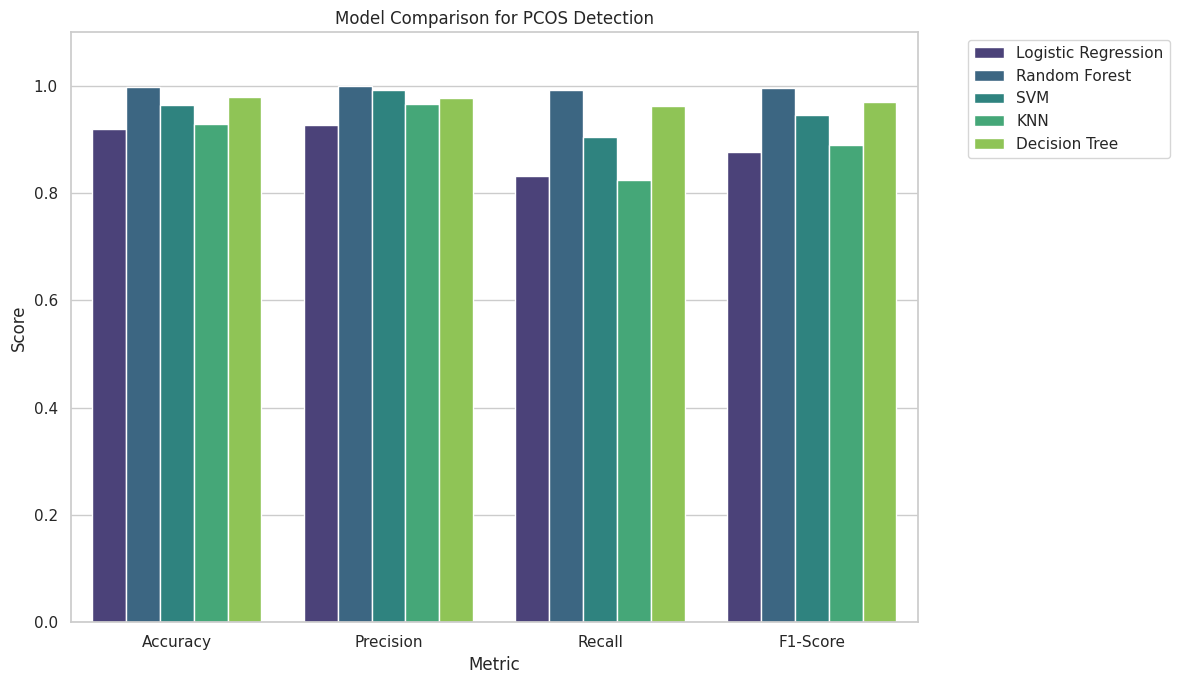

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression    0.9200   0.926829  0.832117  0.876923
1        Random Forest    0.9975   1.000000  0.992701  0.996337
2                  SVM    0.9650   0.992000  0.905109  0.946565
3                  KNN    0.9300   0.965812  0.824818  0.889764
4        Decision Tree    0.9800   0.977778  0.963504  0.970588


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Visualize model comparison
# Data Cleaning
# Remove leading/trailing whitespace from column names
df.columns = [col.strip() for col in df.columns]

# Convert columns that might contain non-numeric characters to numeric
# Coerce errors to NaN (e.g., if a cell contains " " or a string)
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')
df['Fast food (Y/N)'] = pd.to_numeric(df['Fast food (Y/N)'], errors='coerce')

# Drop irrelevant identifier columns - Already dropped in preprocessing step
# df = df.drop(['Sl. No', 'Patient File No.'], axis=1)

# Handle Missing Values
# Imputing with the median is a robust strategy for medical data
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Define Features (X) and Target (y)
X = df_imputed.drop('PCOS (Y/N)', axis=1)
y = df_imputed['PCOS (Y/N)']

# Split the data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
# Standardization is crucial for models like SVM, KNN, and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Dictionary to store results
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, preds))
    results['Precision'].append(precision_score(y_test, preds))
    results['Recall'].append(recall_score(y_test, preds))
    results['F1-Score'].append(f1_score(y_test, preds))

# Create DataFrame
results_df = pd.DataFrame(results)

# Melt the DataFrame for easier plotting with seaborn
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Generate Visualization
plt.figure(figsize=(12, 7))
sns.barplot(data=results_melted, x='Metric', y='Score', hue='Model', palette='viridis')
plt.title('Model Comparison for PCOS Detection')
plt.ylim(0.0, 1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('pcos_model_comparison.png')
plt.show()

print(results_df)

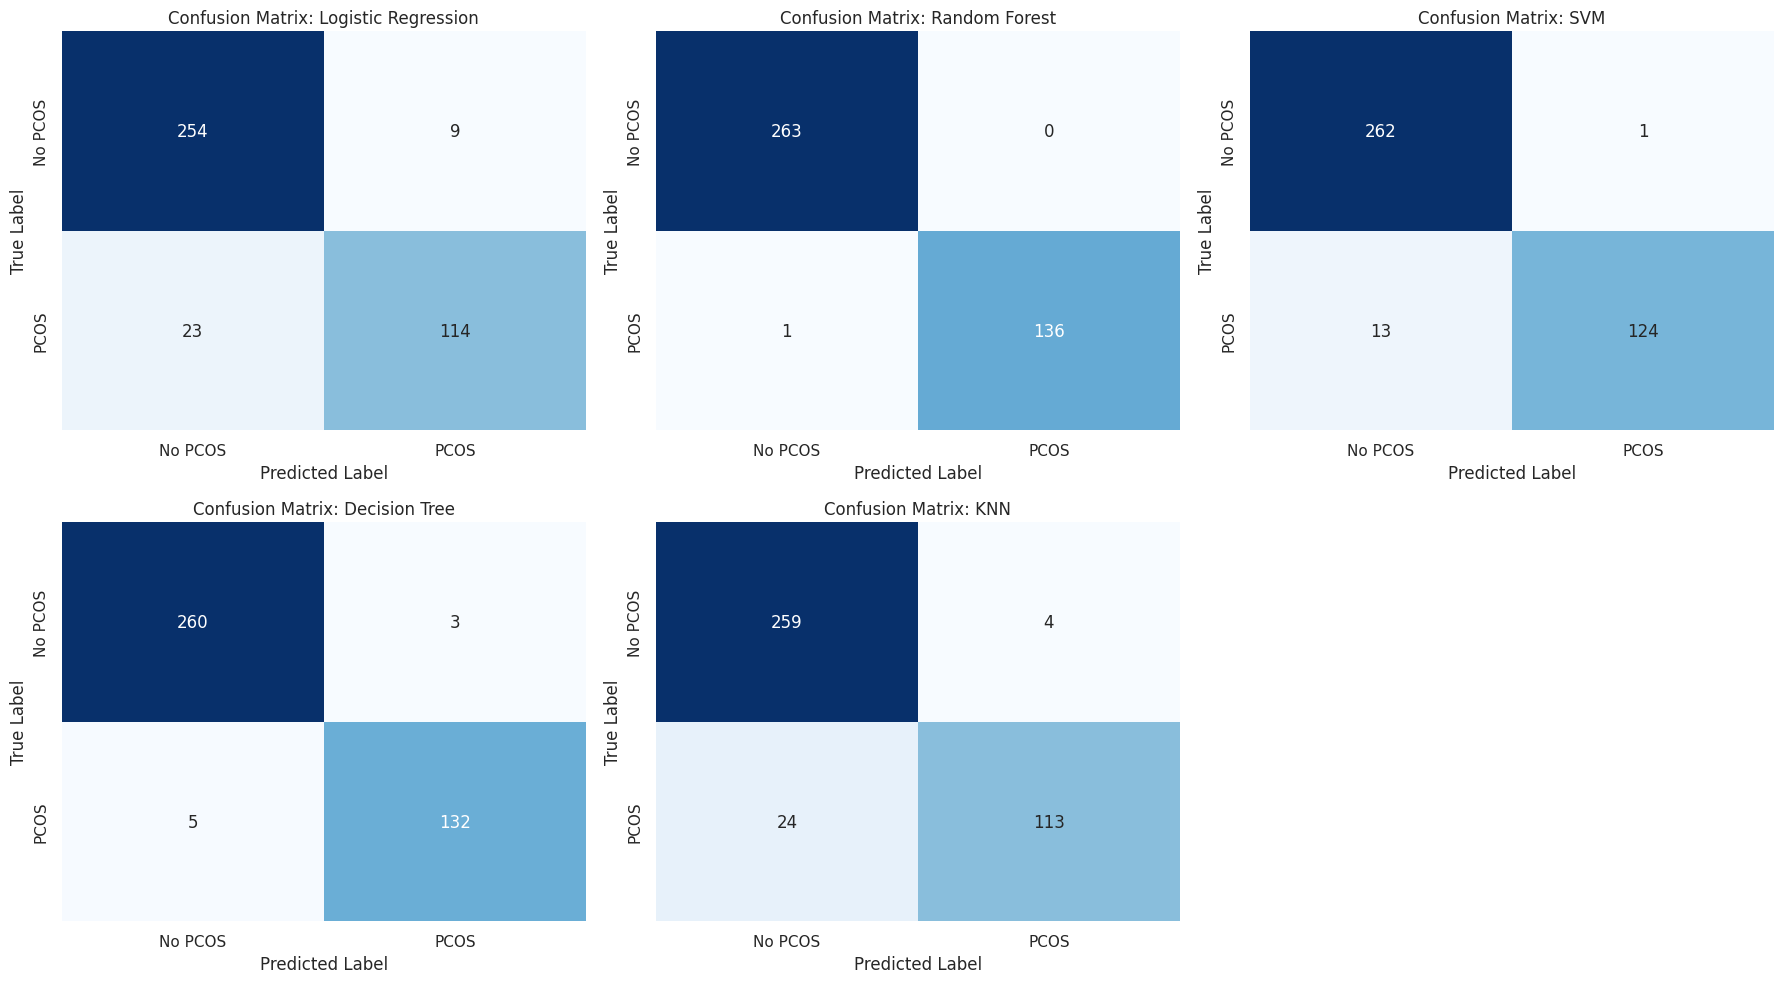

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Confusion Matrices for all models
# Clean column names
df.columns = [col.strip() for col in df.columns]

# Data Cleaning: Convert object columns to numeric and handle missing values
# 'II    beta-HCG(mIU/mL)' and 'AMH(ng/mL)' are often read as objects due to errors
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')

# Fill missing values with median (simple imputation)
df = df.fillna(df.median())

# Separate Target and Features
X = df.drop(['PCOS (Y/N)'], axis=1) # Drop ID columns and target
y = df['PCOS (Y/N)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for SVM, KNN, Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Setup the subplot grid
n_models = len(models)
cols = 3
rows = (n_models + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

# Train each model and plot its confusion matrix
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
    axes[i].set_xticklabels(['No PCOS', 'PCOS'])
    axes[i].set_yticklabels(['No PCOS', 'PCOS'])

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('pcos_confusion_matrices.png')
plt.show()

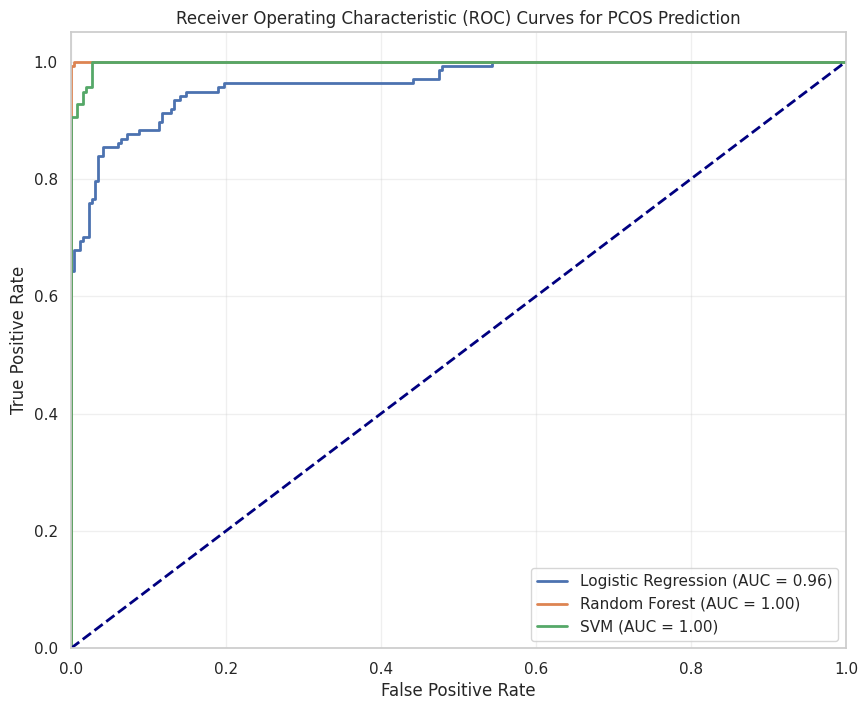

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# ROC Curves for models with probability predictions
# Data Cleaning
# Convert object columns that might have non-numeric characters
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')

# Drop identifier columns (already dropped in preprocessing, removed redundant line)
# df = df.drop(['Sl. No', 'Patient File No.'], axis=1)

# Handle missing values using median imputation
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Define features (X) and target (y)
X = df_imputed.drop('PCOS (Y/N)', axis=1)
y = df_imputed['PCOS (Y/N)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for Logistic Regression and SVM)
saler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
# Note: probability=True is required for SVM to output probabilities
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

# Plot ROC Curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if name == 'Random Forest':
        # Random Forest is tree-based and less sensitive to scaling, can use raw data
        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        # Logistic Regression and SVM benefit from scaling
        model.fit(X_train_scaled, y_train)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for PCOS Prediction')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

# Save and show
plt.savefig('pcos_roc_curves.png')
plt.show()

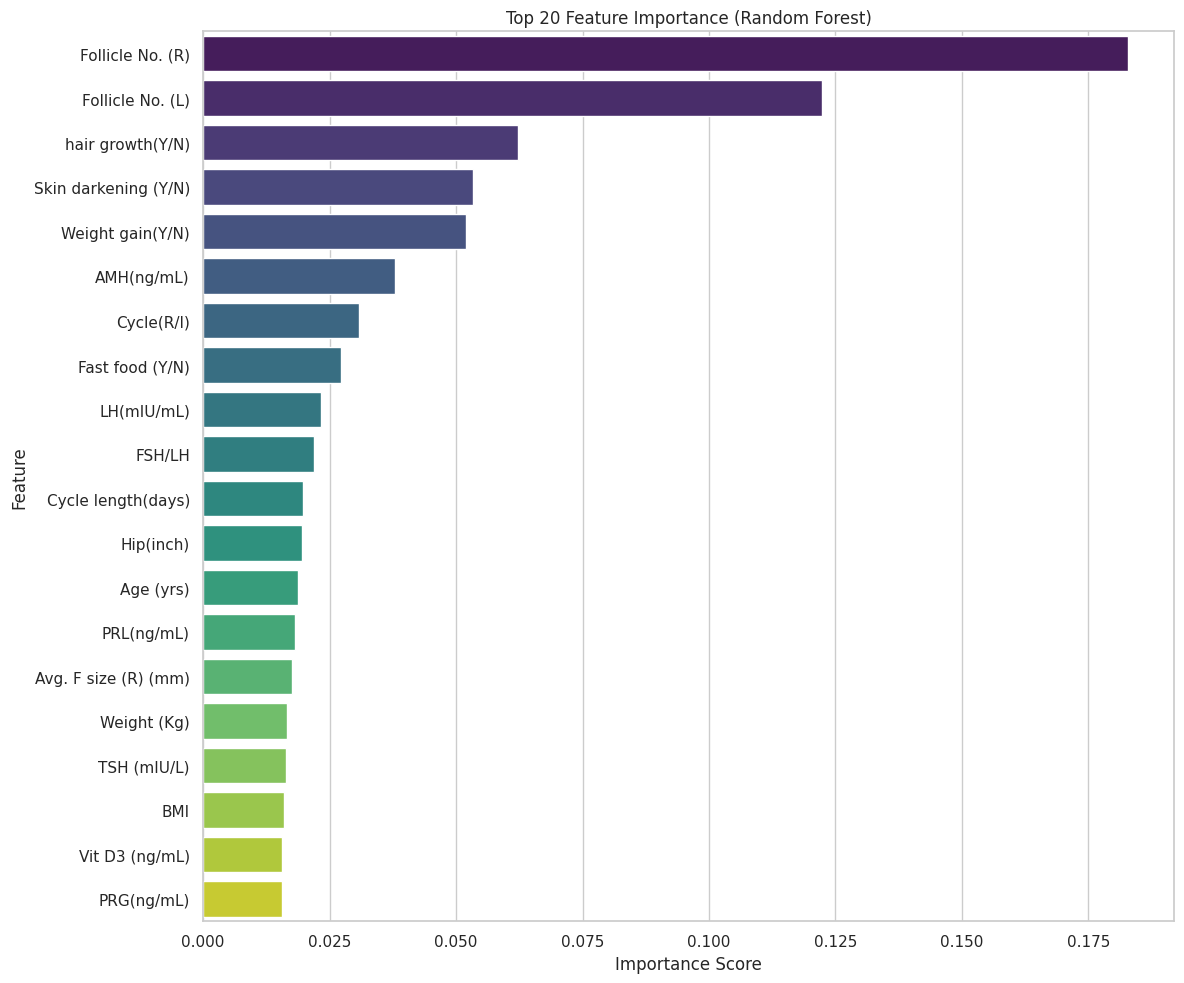

Top 10 Features:
                 Feature  Importance
37      Follicle No. (R)    0.182783
36      Follicle No. (L)    0.122365
28      hair growth(Y/N)    0.062312
29  Skin darkening (Y/N)    0.053284
27      Weight gain(Y/N)    0.051896
22            AMH(ng/mL)    0.037891
8             Cycle(R/I)    0.030871
32       Fast food (Y/N)    0.027205
16            LH(mIU/mL)    0.023271
17                FSH/LH    0.021919


In [ ]:
# Feature importance for tree-based models
# Clean column names
df.columns = [col.strip() for col in df.columns]

# Data Cleaning: Convert potentially non-numeric columns
# 'errors='coerce'' turns non-numeric values into NaN
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')
df['Fast food (Y/N)'] = pd.to_numeric(df['Fast food (Y/N)'], errors='coerce')

# Prepare X and y
# Dropping ID columns and the target
X = df.drop(['PCOS (Y/N)'], axis=1)
y = df['PCOS (Y/N)']

# Handle missing values (Random Forest requires no NaNs)
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_imputed, y)

# Extract Feature Importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(12, 10))
# Plotting the top 20 features
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis', hue='Feature', legend=False)
plt.title('Top 20 Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('pcos_feature_importance.png')
plt.show()

# Print top 10 for reference
print("Top 10 Features:")
print(feature_importance_df.head(10))

Cross-Validation Scores (Accuracy):
Logistic Regression: Mean=0.9235, Std=0.0207
Random Forest: Mean=0.9960, Std=0.0049
SVM: Mean=0.9725, Std=0.0140


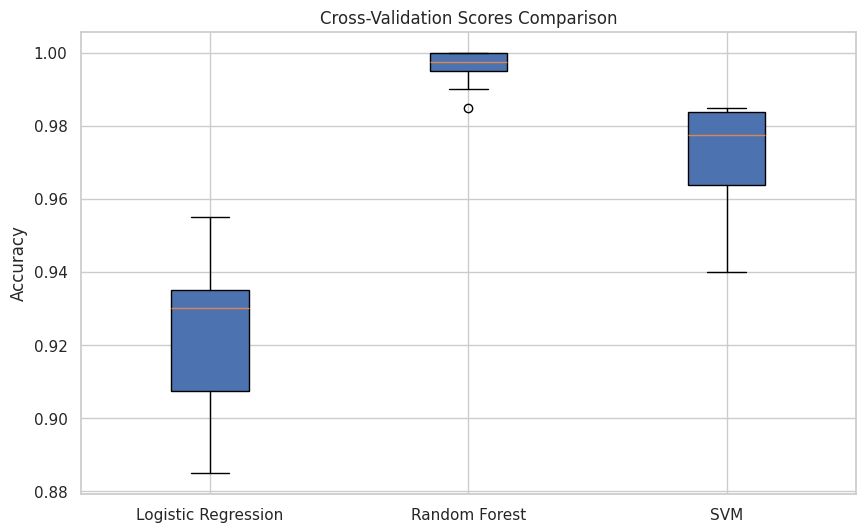

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Cross-validation scores
# Clean column names and data
df.columns = [col.strip() for col in df.columns]
cols_to_numeric = ['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)', 'Fast food (Y/N)']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop IDs and handle missing values
# df = df.drop(['Sl. No', 'Patient File No.'], axis=1) # This line is commented out as the columns were already dropped
imputer = SimpleImputer(strategy='median')
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Prepare Data
X = df_filled.drop('PCOS (Y/N)', axis=1)
y = df_filled['PCOS (Y/N)']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Run Cross-Validation
cv_results = []
names = []
print("Cross-Validation Scores (Accuracy):")
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=10, scoring='accuracy')
    cv_results.append(scores)
    names.append(name)
    print(f"{name}: Mean={scores.mean():.4f}, Std={scores.std():.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(cv_results, tick_labels=names, patch_artist=True)
plt.title('Cross-Validation Scores Comparison')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('pcos_cross_validation_scores.png')
plt.show()

Performing Cross-Validation...
Logistic Regression: Mean Accuracy = 0.9235
Random Forest: Mean Accuracy = 0.9935
SVM: Mean Accuracy = 0.9715
KNN: Mean Accuracy = 0.9550


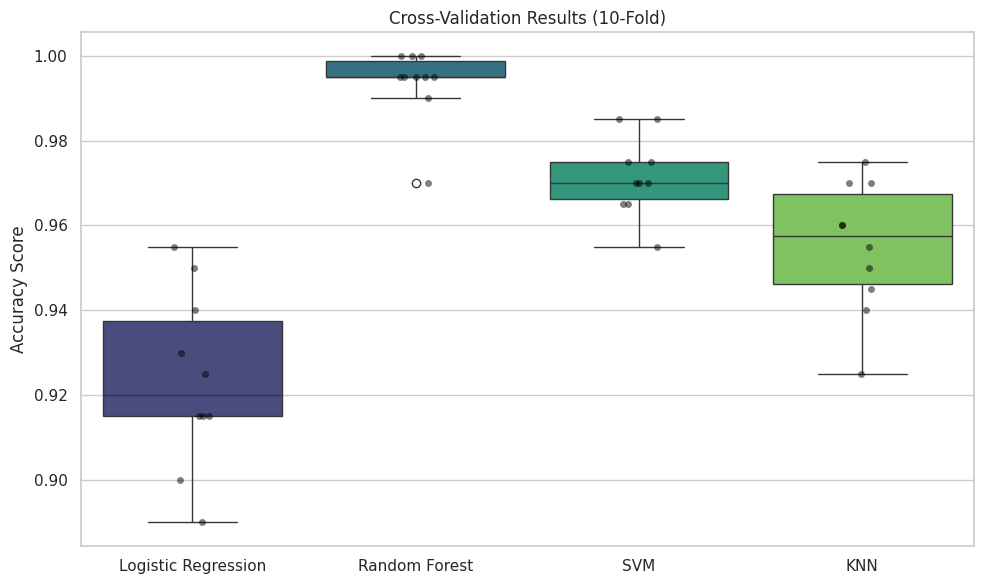

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Visualize cross-validation results
# Convert potential object columns to numeric
cols_to_numeric = ['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)', 'Fast food (Y/N)']
for col in cols_to_numeric:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop ID columns
cols_to_drop = ['Sl. No', 'Patient File No.']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# Separate X and y
target_col = 'PCOS (Y/N)'
X = df.drop(columns=[target_col])
y = df[target_col]

# Handle Missing Values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 3. Define Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

results = []
names = []

# 4. Perform Cross-Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Performing Cross-Validation...")

for name, model in models.items():
    # Pipeline: Scale -> Model (Scaling is crucial for SVM, KNN, LR)
    steps = [('scaler', StandardScaler()), ('model', model)]
    pipeline = Pipeline(steps)

    cv_scores = cross_val_score(pipeline, X_imputed, y, cv=cv, scoring='accuracy')

    results.append(cv_scores)
    names.append(name)
    print(f"{name}: Mean Accuracy = {cv_scores.mean():.4f}")

# 5. Visualize Results
results_df = pd.DataFrame(np.array(results).T, columns=names)

plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, palette='viridis')
sns.stripplot(data=results_df, color='black', alpha=0.5, jitter=True)
plt.title('Cross-Validation Results (10-Fold)')
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.savefig('pcos_cv_results.png')
plt.show()

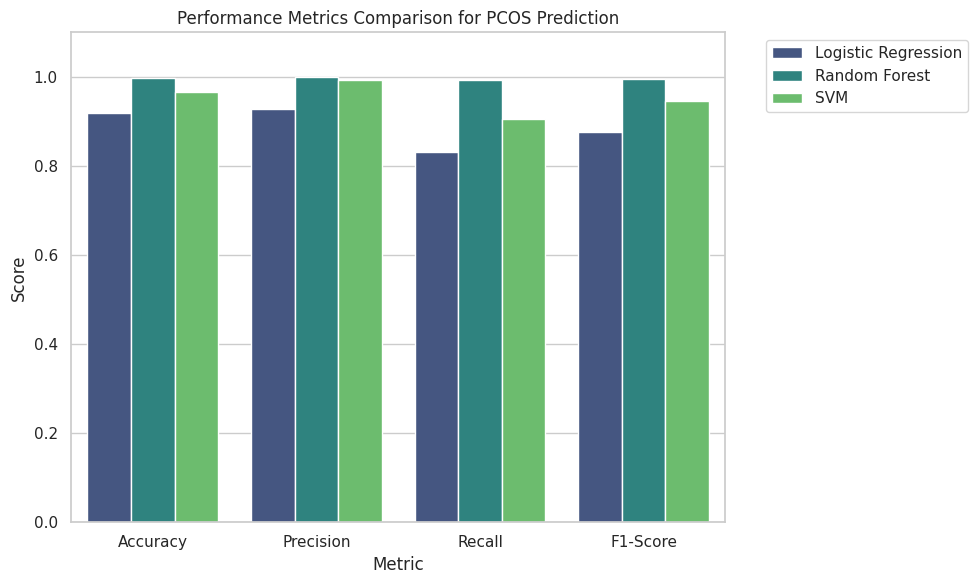

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression    0.9200   0.926829  0.832117  0.876923
1        Random Forest    0.9975   1.000000  0.992701  0.996337
2                  SVM    0.9650   0.992000  0.905109  0.946565


In [ ]:
# Performance metrics comparison chart
#  Convert object columns to numeric (handling errors)
# 'II beta-HCG' and 'AMH' often contain non-numeric characters in this dataset
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')

# Select Features and Target
# Drop non-predictive ID columns and the target column from X
X = df.drop(['PCOS (Y/N)'], axis=1)
y = df['PCOS (Y/N)']

#  Handle Missing Values
# Simple mean imputation for numerical features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

#  Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

#  Scale data (Important for SVM and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

#  Train and Evaluate
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

for name, model in models.items():
    if name == 'Random Forest':
        # Random Forest works fine with unscaled data
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    else:
        # Use scaled data for others
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)

    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, preds))
    results['Precision'].append(precision_score(y_test, preds, zero_division=0))
    results['Recall'].append(recall_score(y_test, preds, zero_division=0))
    results['F1-Score'].append(f1_score(y_test, preds, zero_division=0))

# Create DataFrame and Plot
results_df = pd.DataFrame(results)
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=results_melted, x='Metric', y='Score', hue='Model', palette='viridis')
plt.title('Performance Metrics Comparison for PCOS Prediction')
plt.ylim(0, 1.1) # Set y-axis limit to 0-1.1 to show full bars
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('pcos_performance_comparison.png')
plt.show()

print(results_df)


--- 5. Final Regularized Model Evaluation ---
Final Training Accuracy: 100.00%
Final Testing Accuracy:  99.50%
Overfitting Gap:         0.50%
Mean Squared Error (MSE): 0.0050
Mean Absolute Error (MAE): 0.0050


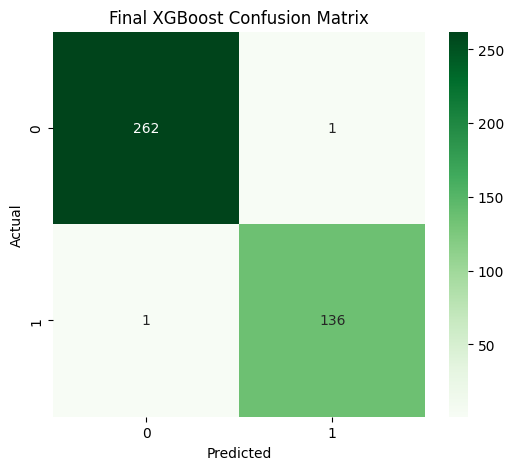

In [ ]:
#  FINAL EVALUATION & ERROR CALCULATION

print("\n--- 5. Final Regularized Model Evaluation ---")

best_params = study.best_params
final_model = XGBClassifier(**best_params, eval_metric='logloss')
final_model.fit(X_train, y_train)

# Predictions
train_preds = final_model.predict(X_train)
test_preds = final_model.predict(X_test)

# A. Overfitting Check (Gap Analysis)
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)
gap = train_acc - test_acc

print(f"Final Training Accuracy: {train_acc*100:.2f}%")
print(f"Final Testing Accuracy:  {test_acc*100:.2f}%")
print(f"Overfitting Gap:         {gap*100:.2f}%")

# B. Error Metrics (MSE, MAE)
mse = mean_squared_error(y_test, test_preds)
mae = mean_absolute_error(y_test, test_preds)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# C. Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, test_preds), annot=True, fmt='d', cmap='Greens')
plt.title('Final XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      0.99      1.00       137

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



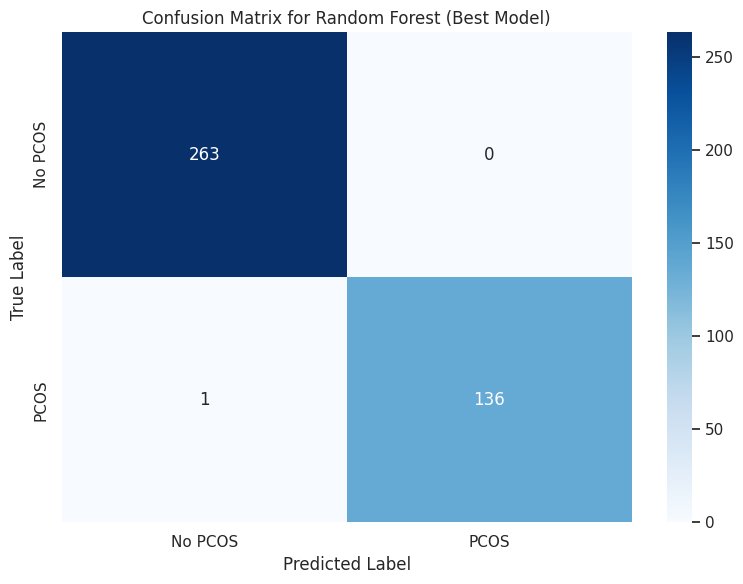

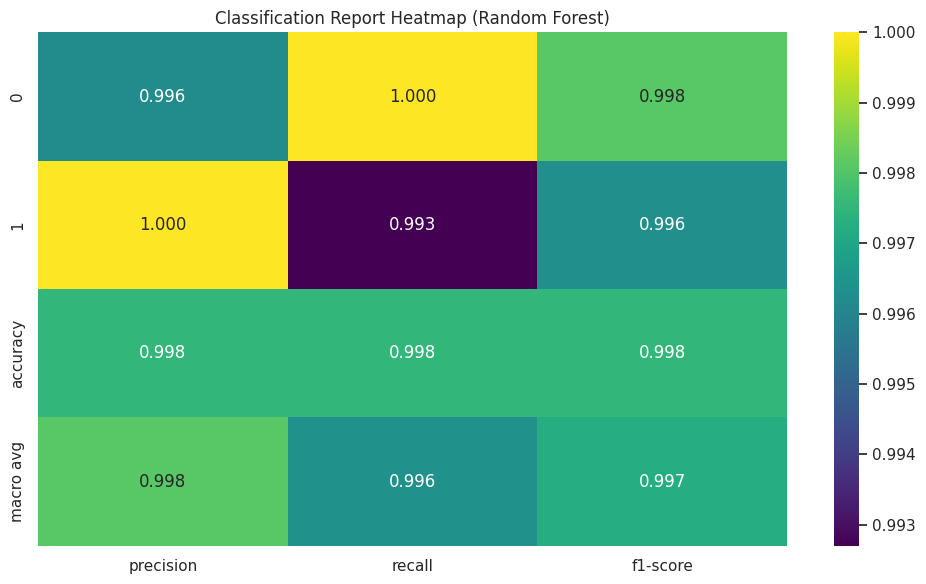

In [ ]:
# Detailed classification report for the best model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 1. Load data
df = pd.read_csv('PCOS_extended_dataset.csv')

# 2. Clean column names
df.columns = [col.strip() for col in df.columns]

# 3. Data Cleaning
# Convert object columns to numeric
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')
df['Fast food (Y/N)'] = pd.to_numeric(df['Fast food (Y/N)'], errors='coerce')

# Drop columns that are not useful for prediction
X = df.drop(['Sl. No', 'Patient File No.', 'PCOS (Y/N)'], axis=1)
y = df['PCOS (Y/N)']

# Handle missing values
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train the Best Model (Random Forest)
# Based on previous comparison, RF was the best
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)

# Print Text Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 6. Visualizations
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No PCOS', 'PCOS'], yticklabels=['No PCOS', 'PCOS'])
plt.title('Confusion Matrix for Random Forest (Best Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('pcos_best_model_confusion_matrix.png')

# Classification Report Heatmap
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt='.3f')
plt.title('Classification Report Heatmap (Random Forest)')
plt.tight_layout()
plt.savefig('pcos_classification_report_heatmap.png')